### Prepare Train and Validation Data

In [1]:
import joblib
import warnings
import sys
import seaborn as sns
import pandas as pd
import pickle
import pyreadr

import matplotlib.pyplot as plt
from pyprojroot import here
from xgboost import plot_importance
import plotnine as p9
from plotnine import *

sys.path.insert(0, f"{here()}/src")
from prep_dataframe import read_dataframe
from test import test

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None)
pd.reset_option("mode.chained_assignment")

In [2]:
result = pyreadr.read_r(f"{here()}/data/interim/df_combined.rds") 

In [3]:
df = result[None]

In [4]:
data=pd.DataFrame(df)

In [5]:
data.shape

(3144, 1536)

In [6]:
data.sample(5)

scan_id Sequence  FS_InterCranial_Vol  FS_BrainSeg_Vol  \
247   NDARKR010EN7  T1w_HCP         1.494226e+06        1256400.0   
3091         P1085      NaN         1.441647e+06        1169709.0   
1749         27025      NaN         1.644399e+06        1231390.0   
2168         25663      NaN         1.497419e+06        1167259.0   
1359         27087      NaN         1.352503e+06        1061305.0   

      FS_BrainSeg_Vol_No_Vent  FS_BrainSeg_Vol_No_Vent_Surf  FS_LCort_GM_Vol  \
247                 1246206.0                  1.247406e+06    311308.650040   
3091                1155235.0                  1.155469e+06    259262.375030   
1749                1219363.0                  1.219246e+06    241205.502584   
2168                1150505.0                  1.150327e+06    244380.210723   
1359                1049419.0                  1.049160e+06    231151.315189   

      FS_RCort_GM_Vol  FS_TotCort_GM_Vol  FS_SubCort_GM_Vol  FS_Total_GM_Vol  \
247     311853.442227      623162.092267            59916.0    788373.092267   
3091    256628.376570      515890.751600            60163.0    678943.751600   
1749    240207.142672      481412.645256            65464.0    678763.645256   
2168    246621.285263      491001.495987            59399.0    677078.495987   
1359    230739.188543      461890.503733            54084.0    610354.503733   

      FS_SupraTentorial_Vol  FS_SupraTentorial_Vol_No_Vent  \
247            1.129820e+06                   1.121778e+06   
3091           1.043839e+06                   1.032477e+06   
1749           1.067752e+06                   1.059022e+06   
2168           1.011506e+06                   9.986173e+05   
1359           9.435874e+05                   9.348614e+05   

      FS_SupraTentorial_No_Vent_Voxel_Count  FS_L_WM_Vol  FS_R_WM_Vol  \
247                               1118284.0          NaN          NaN   
3091                              1029377.0          NaN          NaN   
1749                              1056519.0          NaN          NaN   
2168                               995633.0          NaN          NaN   
1359                               933053.0          NaN          NaN   

      FS_Tot_WM_Vol  FS_Mask_Vol  FS_BrainSegVol_eTIV_Ratio  \
247             NaN    1559835.0                   0.840837   
3091            NaN    1524209.0                   0.811370   
1749            NaN    1698844.0                   0.748839   
2168            NaN    1619765.0                   0.779514   
1359            NaN    1398299.0                   0.784697   

      FS_MaskVol_eTIV_Ratio  FS_LH_Defect_Holes  FS_RH_Defect_Holes  \
247                1.043908                35.0                39.0   
3091               1.057270                57.0                59.0   
1749               1.033109                27.0                26.0   
2168               1.081704                56.0                33.0   
1359               1.033860                58.0                47.0   

      FS_Total_Defect_Holes  FS_L_LatVent_Vol  FS_L_LatVent_Vox  \
247                    74.0            4344.1            4095.0   
3091                  116.0            5415.8            5266.0   
1749                   53.0            4181.8            3852.0   
2168                   89.0            6539.6            6249.0   
1359                  105.0            4065.3            3827.0   

      FS_L_LatVent_Mean  FS_L_LatVent_Std  FS_L_LatVent_Min  FS_L_LatVent_Max  \
247             20.5267           18.7968               0.0             108.0   
3091            32.6905           13.6539               9.0              92.0   
1749            38.3318           14.5155              10.0             100.0   
2168            38.6657           11.9277              17.0              92.0   
1359            23.5869           15.5557               0.0              79.0   

      FS_L_LatVent_Range  FS_L_InfLatVent_Vol  FS_L_InfLatVent_Vox  \
247                108.0                309.3           

In [7]:
data.shape

(3144, 1536)

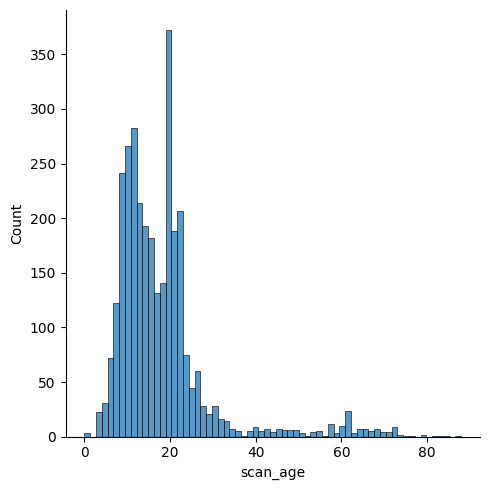

In [8]:
sns.displot(data.scan_age)
plt.show()

In [9]:
data = data[data['Qoala_T_score'] >= 50] 

In [10]:
data.shape

(3144, 1536)

In [11]:
data.sex.value_counts()

sex
Male      1683
Female    1461
Name: count, dtype: int64

In [12]:
data.dataset.value_counts()

dataset
corr      1290
ping       680
abide      371
abide2     358
cmi        275
nih        170
Name: count, dtype: int64

In [13]:
data.columns = [x.lower() for x in data.columns]

In [14]:
data.head(3)

scan_id sequence  fs_intercranial_vol  fs_brainseg_vol  \
0  NDARDH086ZKK  T1w_HCP         1.197441e+06        1012956.0   
1  NDARNH147WGN  T1w_HCP         1.266156e+06        1036137.0   
2  NDARWV984WMM  T1w_HCP         1.329091e+06        1073854.0   

   fs_brainseg_vol_no_vent  fs_brainseg_vol_no_vent_surf  fs_lcort_gm_vol  \
0                1004153.0                  1.004113e+06    251845.794777   
1                1024592.0                  1.024486e+06    253054.672215   
2                1061332.0                  1.061077e+06    254585.118413   

   fs_rcort_gm_vol  fs_totcort_gm_vol  fs_subcort_gm_vol  fs_total_gm_vol  \
0    256444.933368      508290.728145            53157.0    653756.728145   
1    256711.465320      509766.137535            52861.0    667932.137535   
2    253173.351363      507758.469777            51697.0    674248.469777   

   fs_supratentorial_vol  fs_supratentorial_vol_no_vent  \
0          900427.829172                  893846.829172   
1          908293.720727                  899056.720727   
2          932221.978675                  923387.978675   

   fs_supratentorial_no_vent_voxel_count  fs_l_wm_vol  fs_r_wm_vol  \
0                               891170.0          NaN          NaN   
1                               896530.0          NaN          NaN   
2                               920570.0          NaN          NaN   

   fs_tot_wm_vol  fs_mask_vol  fs_brainsegvol_etiv_ratio  \
0            NaN    1282582.0                   0.845934   
1            NaN    1356527.0                   0.818333   
2            NaN    1417919.0                   0.807961   

   fs_maskvol_etiv_ratio  fs_lh_defect_holes  fs_rh_defect_holes  \
0               1.071102                68.0                52.0   
1               1.071374                46.0                29.0   
2               1.066833                99.0                98.0   

   fs_total_defect_holes  fs_l_latvent_vol  fs_l_latvent_vox  \
0                  120.0            3445.7            3083.0   
1                   75.0            4980.4            4654.0   
2                  197.0            3964.5            3631.0   

   fs_l_latvent_mean  fs_l_latvent_std  fs_l_latvent_min  fs_l_latvent_max  \
0            29.8476           14.9641               1.0              83.0   
1            32.2707           13.0294              10.0              85.0   
2            26.8717           15.9100               0.0              79.0   

   fs_l_latvent_range  fs_l_inflatvent_vol  fs_l_inflatvent_vox  \
0                82.0                215.3                192.0   
1                75.0                171.8                156.0   
2                79.0                195.0                155.0   

   fs_l_inflatvent_mean  fs_l_inflatvent_std  fs_l_inflatvent_min  \
0               42.3177              15.3527                  7.0   
1               45.9615              12.9161                 15.0   
2               45.9871              15.1400                  4.0   

   fs_l_inflatvent_max  fs_l_inflatvent_range  fs_l_cerebellum_wm_vol  \
0                 75.0                   68.0                 11128.4   
1                 75.0                   60.0                 12684.7   
2                 72.0                   68.0                 13880.1   

   fs_l_cerebellum_wm_vox  fs_l_cerebellum_wm_mean  fs_l_cerebellum_wm_std  \
0                 10563.0                  84.6115                  7.4548   
1                 12292.0                  82.6514                  7.8063   
2                 13255.0                  82.3636                  8.4739   

   fs_l_cerebellum_wm_min  fs_l_cerebellum_wm_max  fs_l_cerebellum_wm_range  \
0                     9.0                   107.0                      98.0   
1                    29.0                   109.0                      80.0   
2                    27.0                   112.0                      85.0   

   fs_l_cerebellum_cort_vol  fs_l_cerebellum_cort_vox 

In [15]:
def read_train_dataframe(filename):
    df = pd.read_csv(filename,index_col=False)
    vlad_features = pd.read_csv(f"{here()}/references/all_features.csv")
    features = vlad_features.feature_names.tolist()

    df.columns = [x.lower() for x in df.columns]
    df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)
    features = [item.lower() for item in features]
    
    features.insert(0, 'scan_age')
    features.append('split')
    features.append('scan_id')
    df = df[df.columns[df.columns.isin(features)]]
    df = df.reindex(sorted(df.columns), axis=1)

    return df


In [16]:
df = read_train_dataframe(f'{here()}/data/processed/2021-08-26-all-dat-split-labelled.csv')

In [17]:
df.head(3)

fs_3rdvent_vol  fs_4thvent_vol  fs_brainseg_vol  fs_brainseg_vol_no_vent  \
0          1017.3          2717.7          1538232                  1517828   
1           856.2          1464.3          1313055                  1295647   
2           940.3          1823.2          1465261                  1453237   

   fs_brainseg_vol_no_vent_surf  fs_brainsegvol_etiv_ratio  fs_brainstem_vol  \
0                  1.517254e+06                   0.752551           24282.1   
1                  1.295334e+06                   0.808076           20987.7   
2                  1.453483e+06                   0.856278           21710.9   

   fs_cc_anterior_vol  fs_cc_central_vol  fs_cc_midanterior_vol  \
0              1093.2              574.1                  648.4   
1               985.9              639.3                  596.7   
2               962.6              633.5                  587.2   

   fs_cc_midposterior_vol  fs_cc_posterior_vol  fs_csf_vol  \
0                   726.6               1074.7      1019.4   
1                   491.9               1020.5       967.9   
2                   682.1               1049.9      1010.5   

   fs_intercranial_vol  fs_l_accumbensarea_vol  fs_l_amygdala_vol  \
0         2.044024e+06                   666.8             2286.4   
1         1.624915e+06                   513.7             1757.9   
2         1.711198e+06                   544.9             1988.7   

   fs_l_bankssts_area  fs_l_bankssts_grayvol  \
0                1261                   3496   
1                1053                   2981   
2                1220                   3282   

   fs_l_caudalanteriorcingulate_area  fs_l_caudalanteriorcingulate_grayvol  \
0                                982                                  3688   
1                                852                                  2853   
2                                760                                  2180   

   fs_l_caudalmiddlefrontal_area  fs_l_caudalmiddlefrontal_grayvol  \
0                           3230                              9893   
1                           2670                              8754   
2                           2990                              8990   

   fs_l_caudate_vol  fs_l_cerebellum_cort_vol  fs_l_cerebellum_wm_vol  \
0            5328.4                   71657.5                 16633.4   
1            4353.5                   61279.9                 16499.3   
2            4298.4                   63297.1                 14793.4   

   fs_l_choroidplexus_vol  fs_l_cuneus_area  fs_l_cuneus_grayvol  \
0                   578.1              1749                 5111   
1                   301.3              1540                 3711   
2                   374.4              1831                 4242   

   fs_l_entorhinal_area  fs_l_entorhinal_grayvol  fs_l_frontalpole_area  \
0                   511                     2591                    286   
1                   308                     1690                    316   
2                   594                     3035                    324   

   fs_l_frontalpole_grayvol  fs_l_fusiform_area  fs_l_fusiform_grayvol  \
0                      1246                4276                  14047   
1                      1524                3592                  12586   
2                      1591                3983                  14557   

   fs_l_hippo_vol  fs_l_inferiorparietal_area  fs_l_inferiorparietal_grayvol  \
0          4871.3                        6006                          17216   
1          4700.7                        4828                          15752   
2          4380.7                        5884                          19921   

   fs_l_inferiortemporal_area  fs_l_inferiortemporal_grayvol  \
0                        4165                          13642   
1                        3773                          14067   
2                        5122                          20934   

   fs_l_inflatvent_vol  fs_l_insula_area 

In [18]:
df = df[df['split'] != 'TEST']

In [19]:
df.shape, data.shape

((1622, 189), (3144, 1536))

In [20]:
train = data[['scan_id', 'fs_subcort_gm_vol', 'fs_brainseg_vol', 'qoala_t_score', 'dataset', 'scan_age', 'sex']]

In [21]:
train.sample()

scan_id  fs_subcort_gm_vol  fs_brainseg_vol  qoala_t_score dataset  \
2093   25811            54860.0        1104247.0      91.017964    corr   

      scan_age     sex  
2093      19.0  Female

In [22]:
df_all = pd.merge(train, df, on=['scan_age', 'fs_subcort_gm_vol', 'fs_brainseg_vol'])

In [23]:
df_all.shape

(1601, 193)

In [24]:
df_all.dataset.value_counts()

dataset
corr      395
ping      381
abide2    257
abide     231
cmi       179
nih       158
Name: count, dtype: int64

In [25]:
df_site = df_all[['sex', 'dataset', 'scan_age', 'split']]
df_site.groupby(['dataset', 'split'], as_index=True).describe()

scan_age                                            \
                    count       mean       std       min        25%   
dataset split                                                         
abide   TRAIN       188.0  13.442349  2.529916  9.106800  11.302500   
        VALIDATE     43.0  13.209830  2.381533  9.200000  11.280000   
abide2  TRAIN       212.0  11.527348  2.258534  9.000000  10.000000   
        VALIDATE     45.0  12.157796  2.678932  9.000000  10.000000   
cmi     TRAIN       146.0  12.613030  2.652176  9.006502  10.378650   
        VALIDATE     33.0  12.757613  2.788544  9.093543  10.254848   
corr    TRAIN       316.0  15.361329  3.149096  9.000000  12.967500   
        VALIDATE     79.0  15.483418  3.061361  9.000000  13.000000   
nih     TRAIN       126.0  13.222222  2.816775  9.000000  11.000000   
        VALIDATE     32.0  13.406250  2.780803  9.000000  11.000000   
ping    TRAIN       295.0  13.449718  2.773046  9.000000  11.125000   
        VALIDATE     86.0  12.662791  2.792377  9.000000  10.437500   

                                                   
                        50%        75%        max  
dataset split                                      
abide   TRAIN     13.315000  15.300500  18.900000  
        VALIDATE  12.920000  14.855000  17.790000  
abide2  TRAIN     11.000000  12.430137  19.000000  
        VALIDATE  11.200000  13.652055  18.750000  
cmi     TRAIN     12.154974  14.607261  18.914099  
        VALIDATE  12.012662  15.265343  17.603239  
corr    TRAIN     15.290000  18.900000  19.000000  
        VALIDATE  16.000000  18.000000  19.000000  
nih     TRAIN     13.000000  16.000000  18.000000  
        VALIDATE  14.000000  15.000000  18.000000  
ping    TRAIN     13.416667  15.583333  19.000000  
        VALIDATE  11.875000  14.729167  18.750000

In [26]:
df_site.groupby(['sex', 'split'], as_index=True).describe()

scan_age                                                  \
                   count       mean       std  min        25%        50%   
sex    split                                                               
Female TRAIN       570.0  13.461964  3.119021  9.0  10.751326  13.000000   
       VALIDATE    132.0  13.624970  3.145233  9.0  11.000000  13.235000   
Male   TRAIN       713.0  13.502089  2.945905  9.0  11.000000  13.000000   
       VALIDATE    186.0  13.326983  2.947280  9.0  10.854167  12.916667   

                                  
                       75%   max  
sex    split                      
Female TRAIN     16.000000  19.0  
       VALIDATE  16.480378  19.0  
Male   TRAIN     15.900000  19.0  
       VALIDATE  15.333333  19.0

In [27]:
df_all.sex.value_counts(), df_all.shape

(sex
 Male      899
 Female    702
 Name: count, dtype: int64,
 (1601, 193))

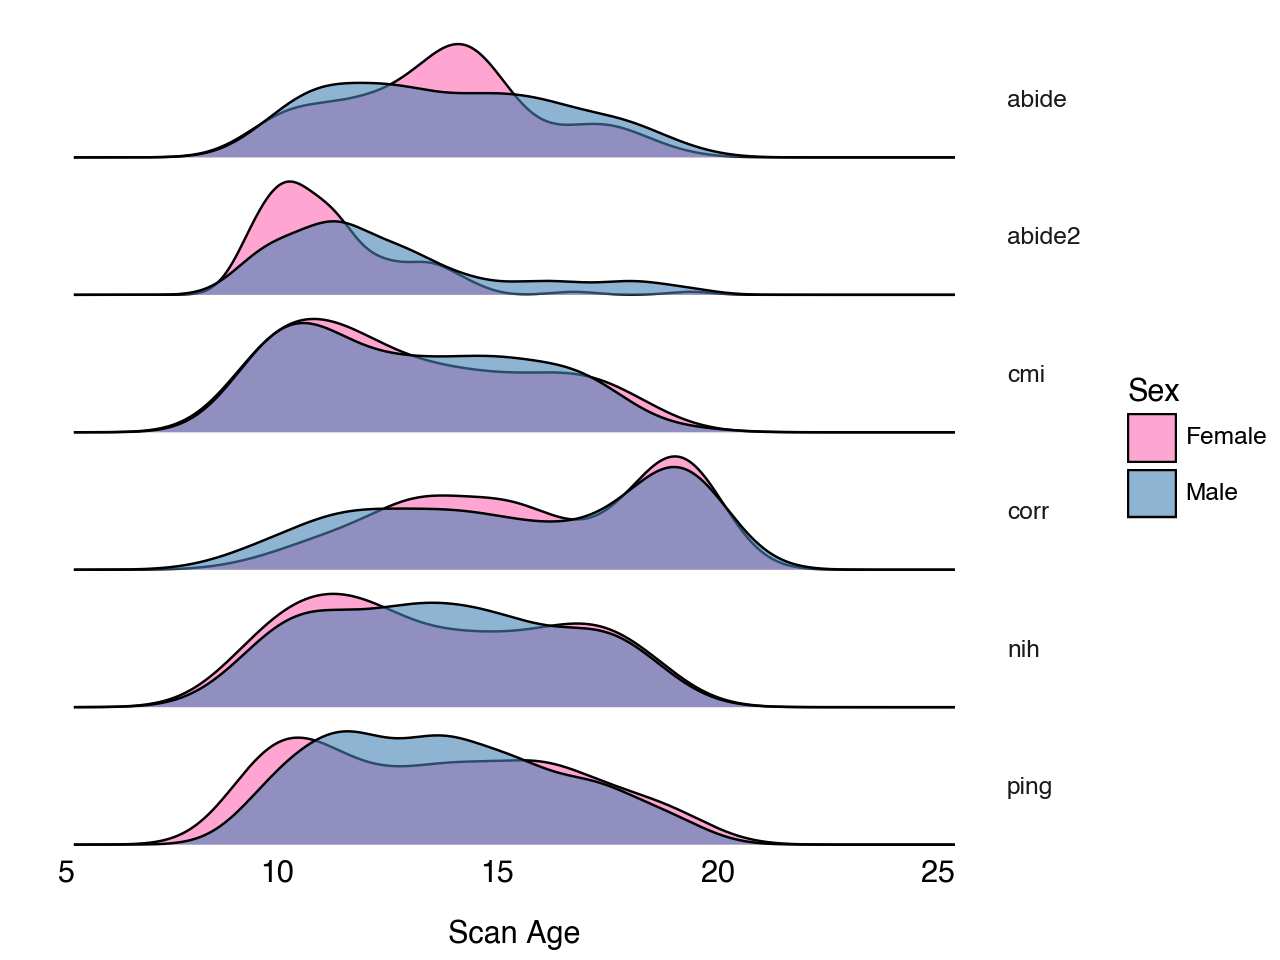

In [28]:
# Create a ridgeline plot
ggplot = (
    p9.ggplot(df_all, p9.aes(x="scan_age", y="..density..", fill="sex"))
    + p9.geom_density(alpha=0.6)
    + p9.facet_grid("dataset ~ .", scales="free", space="free")
    + p9.scale_fill_manual(values=["#FF69B4", "#4682B4"])
    + p9.theme_void()
    + p9.theme(
        axis_text_x=p9.element_text(angle=0, hjust=1, margin={'t': 5}),
        axis_title_x=p9.element_text(vjust=-0.5),
        axis_title_y=p9.element_blank(),  # Remove y-axis label
        legend_title=p9.element_text(vjust=0.5),
        legend_position="right",
        strip_text_y=p9.element_text(angle=0, ha="right", va="center"),
    )
    + p9.labs(x="Scan Age", y="", fill="Sex")  # Set y-axis label to empty string
    + p9.xlim(5, 25)  # Set x-axis limits to 5-25
)
print(ggplot)


In [29]:
#df_all.to_csv(f"{here()}/data/train/df_train_partitioned.csv", index=False)

In [30]:
df_all.head()

scan_id  fs_subcort_gm_vol  fs_brainseg_vol  qoala_t_score dataset  \
0  NDARDH086ZKK            53157.0        1012956.0      69.860279     cmi   
1  NDARJY676CWZ            54225.0        1063862.0      85.029940     cmi   
2  NDARWR247CE1            54564.0        1070217.0      85.628743     cmi   
3  NDARCG808HDJ            57996.0        1134609.0      68.662675     cmi   
4  NDARDY776AKH            53375.0        1065964.0      85.029940     cmi   

    scan_age     sex  fs_3rdvent_vol  fs_4thvent_vol  fs_brainseg_vol_no_vent  \
0   9.488364  Female           490.7          1319.1                  1004153   
1  11.823636    Male           635.1          2446.1                  1054026   
2  16.496691  Female           564.8          1266.8                  1059740   
3   9.477412  Female           947.1          2445.3                  1122434   
4  16.444672  Female           790.2          1880.7                  1052814   

   fs_brainseg_vol_no_vent_surf  fs_brainsegvol_etiv_ratio  fs_brainstem_vol  \
0                  1.004113e+06                   0.845934           15847.5   
1                  1.053512e+06                   0.799531           19408.5   
2                  1.059403e+06                   0.763461           17470.4   
3                  1.122223e+06                   0.803014           17226.9   
4                  1.052473e+06                   0.752452           18234.6   

   fs_cc_anterior_vol  fs_cc_central_vol  fs_cc_midanterior_vol  \
0               723.2              596.2                  480.5   
1               808.7              503.1                  674.4   
2               846.2              669.7                  680.3   
3               699.7              599.7                  421.4   
4               725.4              648.3                  695.8   

   fs_cc_midposterior_vol  fs_cc_posterior_vol  fs_csf_vol  \
0                   434.7                746.9       656.1   
1                   378.2                824.2       872.0   
2                   543.0                954.5       863.9   
3                   327.8                649.3       995.4   
4                   338.0                674.3       960.4   

   fs_intercranial_vol  fs_l_accumbensarea_vol  fs_l_amygdala_vol  \
0         1.197441e+06                   529.5             1382.8   
1         1.330608e+06                   522.3             1563.1   
2         1.401797e+06                   514.3             1506.6   
3         1.412938e+06                   575.8             1608.5   
4         1.416654e+06                   548.9             1520.9   

   fs_l_bankssts_area  fs_l_bankssts_grayvol  \
0                 980                   3048   
1                 963                   2724   
2                 993                   2505   
3                1017                   2953   
4                 802                   2487   

   fs_l_caudalanteriorcingulate_area  fs_l_caudalanteriorcingulate_grayvol  \
0                                658                                  2180   
1                                464                                  1291   
2                                588                                  1951   
3                                683                                  2209   
4                                593                                  1962   

   fs_l_caudalmiddlefrontal_area  fs_l_caudalmiddlefrontal_grayvol  \
0                           2012                              6553   
1                           1986                              6583   
2                           2317                              7806   
3                           2643                              8961   
4                           2232                              7081   

   fs_l_caudate_vol  fs_l_cerebellum_cort_vol  fs_l_cerebellum_wm_vol  \
0            3705.8                   45784.0                 11128.4   
1            3332.1                   56192.7          

In [31]:
data.dropna(subset=['scan_age'], inplace=True)

In [32]:
data.shape

(3144, 1536)

In [33]:
df_site = data[['sex', 'dataset', 'scan_age']]
df_site.groupby(['dataset', 'sex'], as_index=True).describe()
#data.dataset.value_counts()

scan_age                                                        \
                  count       mean        std       min        25%        50%   
dataset sex                                                                     
abide   Female     82.0  15.420287   6.826851  7.750200  10.895000  13.790000   
        Male      289.0  16.972944   7.377222  7.000000  11.810000  14.910000   
abide2  Female    120.0  11.320016   4.066218  5.907000   9.221918  10.034247   
        Male      238.0  15.480528  10.228501  5.887000   9.925000  11.743836   
cmi     Female    130.0  11.041064   3.518083  5.053159   8.446725  10.424195   
        Male      145.0  11.070718   3.579990  5.203627   8.371206  10.369838   
corr    Female    696.0  25.890876  15.496395  6.000000  19.000000  21.000000   
        Male      594.0  23.272710  12.006258  6.000000  18.250000  21.000000   
nih     Female     97.0  12.876289   3.055929  8.000000  10.000000  12.000000   
        Male       73.0  12.904110   2.991490  8.000000  10.000000  13.000000   
ping    Female    336.0  12.768849   5.077163  0.000000   8.750000  12.500000   
        Male      344.0  12.529554   4.932137  0.000000   8.812500  12.500000   

                                      
                      75%        max  
dataset sex                           
abide   Female  17.377500  46.000000  
        Male    20.560000  56.200000  
abide2  Female  11.683562  30.000000  
        Male    16.458333  64.000000  
cmi     Female  13.456878  21.482318  
        Male    13.895847  21.189368  
corr    Female  25.000000  88.000000  
        Male    24.000000  82.000000  
nih     Female  16.000000  18.000000  
        Male    15.000000  18.000000  
ping    Female  17.583333  21.000000  
        Male    16.500000  21.000000

In [34]:
_df = data.query('(2 < scan_age < 9) or (19 < scan_age <= 30)')

In [35]:
#_df = data.query('19 < scan_age <= 30')

In [36]:
_df.shape

(1287, 1536)

In [37]:
_df.sample(2)

scan_id sequence  fs_intercranial_vol  fs_brainseg_vol  \
1971   25168      NaN         1.604053e+06        1282546.0   
1357   27077      NaN         1.603528e+06        1225522.0   

      fs_brainseg_vol_no_vent  fs_brainseg_vol_no_vent_surf  fs_lcort_gm_vol  \
1971                1246132.0                  1.246434e+06    270873.252125   
1357                1203447.0                  1.203930e+06    271900.203610   

      fs_rcort_gm_vol  fs_totcort_gm_vol  fs_subcort_gm_vol  fs_total_gm_vol  \
1971    272812.667809      543685.919934            64433.0    711767.919934   
1357    272094.109435      543994.313045            60127.0    730004.313045   

      fs_supratentorial_vol  fs_supratentorial_vol_no_vent  \
1971           1.152875e+06                   1.120514e+06   
1357           1.070187e+06                   1.054374e+06   

      fs_supratentorial_no_vent_voxel_count  fs_l_wm_vol  fs_r_wm_vol  \
1971                              1116807.0          NaN          NaN   
1357                              1052596.0          NaN          NaN   

      fs_tot_wm_vol  fs_mask_vol  fs_brainsegvol_etiv_ratio  \
1971            NaN    1748356.0                   0.799566   
1357            NaN    1652510.0                   0.764266   

      fs_maskvol_etiv_ratio  fs_lh_defect_holes  fs_rh_defect_holes  \
1971               1.089962                57.0                69.0   
1357               1.030546                19.0                30.0   

      fs_total_defect_holes  fs_l_latvent_vol  fs_l_latvent_vox  \
1971                  126.0           15612.8           15333.0   
1357                   49.0            7622.1            7347.0   

      fs_l_latvent_mean  fs_l_latvent_std  fs_l_latvent_min  fs_l_latvent_max  \
1971            16.7456           12.6730               0.0              93.0   
1357            21.7373           14.9739               0.0              90.0   

      fs_l_latvent_range  fs_l_inflatvent_vol  fs_l_inflatvent_vox  \
1971                93.0                875.2                858.0   
1357                90.0                482.3                454.0   

      fs_l_inflatvent_mean  fs_l_inflatvent_std  fs_l_inflatvent_min  \
1971               32.3590              15.5908                  1.0   
1357               34.3568              16.6230                  0.0   

      fs_l_inflatvent_max  fs_l_inflatvent_range  fs_l_cerebellum_wm_vol  \
1971                 82.0                   81.0                 13288.5   
1357                 80.0                   80.0                 13255.1   

      fs_l_cerebellum_wm_vox  fs_l_cerebellum_wm_mean  fs_l_cerebellum_wm_std  \
1971                 12614.0                  74.9998                  9.6416   
1357                 12716.0                  85.1647                  7.3521   

      fs_l_cerebellum_wm_min  fs_l_cerebellum_wm_max  \
1971                    11.0                   109.0   
1357                    12.0                   106.0   

      fs_l_cerebellum_wm_range  fs_l_cerebellum_cort_vol  \
1971                      98.0                   52618.2   
1357                      94.0                   62724.4   

      fs_l_cerebellum_cort_vox  fs_l_cerebellum_cort_mean  \
1971                   52841.0                    42.5967   
1357                   62288.0                    57.3119   

      fs_l_cerebellum_cort_std  fs_l_cerebellum_cort_min  \
1971                   12.7864                       0.0   
1357                   12.8145                       2.0   

      fs_l_cerebellum_cort_max  fs_l_cerebellum_cort_range  \
1971                      95.0                        95.0   
1357                     101.0                        99.0   

      fs_l_thalamusproper_vol  fs_l_thalamusproper_vox  \
1971                   7865.9                   8129.0   
1357                   7539.5                   7798.0   

      fs_l_thalamusproper_mean  fs_l_thalamusproper_std  \
1971                   80.2940         

In [38]:
#sns.displot(_df.scan_age)

In [39]:
def read_ext_dataframe(df):
    vlad_features = pd.read_csv(f"{here()}/references/all_features.csv")
    features = vlad_features.feature_names.tolist()

    df.columns = [x.lower() for x in df.columns]
    df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)
    features = [item.lower() for item in features]
    
    features.insert(0, 'scan_age')
    features.append('split')
    features.append('scan_id')
    features.append('sex')
    features.append('dataset')
    features.append('qoala_t_score')
    df = df[df.columns[df.columns.isin(features)]]
    df = df.reindex(sorted(df.columns), axis=1)

    return df


In [40]:
df = read_ext_dataframe(_df)

/var/folders/7w/4mwg2xbx4j9645_p5tvccmph0000gn/T/ipykernel_49580/271540698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
df.head()

dataset  fs_3rdvent_vol  fs_4thvent_vol  fs_brainseg_vol  \
1     cmi           540.5          1279.7        1036137.0   
2     cmi           645.4          2148.2        1073854.0   
7     cmi           649.1          1929.7        1176120.0   
8     cmi          1373.1          2098.0        1191328.0   
9     cmi           885.0          1460.7        1157122.0   

   fs_brainseg_vol_no_vent  fs_brainseg_vol_no_vent_surf  \
1                1024592.0                  1.024486e+06   
2                1061332.0                  1.061077e+06   
7                1162949.0                  1.162958e+06   
8                1174326.0                  1.174362e+06   
9                1142543.0                  1.142488e+06   

   fs_brainsegvol_etiv_ratio  fs_brainstem_vol  fs_cc_anterior_vol  \
1                   0.818333           15545.8               929.6   
2                   0.807961           17938.9              1049.6   
7                   0.823145           16153.9               582.0   
8                   0.827849           18140.2               893.3   
9                   0.788285           18372.1               832.9   

   fs_cc_central_vol  fs_cc_midanterior_vol  fs_cc_midposterior_vol  \
1              444.1                  404.9                   445.8   
2              676.2                  833.7                   361.3   
7              617.8                  482.4                   405.8   
8              566.4                  443.9                   440.6   
9              442.9                  427.5                   482.9   

   fs_cc_posterior_vol  fs_csf_vol  fs_intercranial_vol  \
1                832.1       725.2         1.266156e+06   
2                861.5      1145.8         1.329091e+06   
7                796.5       691.9         1.428812e+06   
8                750.8       955.7         1.439065e+06   
9                782.0       887.8         1.467897e+06   

   fs_l_accumbensarea_vol  fs_l_amygdala_vol  fs_l_bankssts_area  \
1                   479.6             1384.9              1115.0   
2                   463.4             1018.9              1058.0   
7                   540.8             1635.8              1137.0   
8                   517.7             1621.6              1115.0   
9                   425.7             1721.4               734.0   

   fs_l_bankssts_grayvol  fs_l_caudalanteriorcingulate_area  \
1                 3013.0                              480.0   
2                 2704.0                              557.0   
7                 3432.0                              575.0   
8                 3153.0                              537.0   
9                 2230.0                              541.0   

   fs_l_caudalanteriorcingulate_grayvol  fs_l_caudalmiddlefrontal_area  \
1                                1808.0                         2350.0   
2                                1896.0                         2424.0   
7                                1811.0                         2268.0   
8                                1934.0                         2241.0   
9                                1792.0                         2045.0   

   fs_l_caudalmiddlefrontal_grayvol  fs_l_caudate_vol  \
1                            8043.0            3489.7   
2                            7369.0            3770.5   
7                            7794.0            2767.6   
8                            7419.0            3902.3   
9                            6672.0            4283.4   

   fs_l_cerebellum_cort_vol  fs_l_cerebellum_wm_vol  fs_l_choroidplexus_vol  \
1                   51149.3                 12684.7                   418.4   
2                   56263.2                 13880.1                   256.1   
7                   52903.6                 13920.1                   399.6   
8                   59334.8                 15206.2                   367.9   
9                   59951.0                 15745.5                   345.4   

   fs_l_cuneus

In [42]:
data.head()

scan_id sequence  fs_intercranial_vol  fs_brainseg_vol  \
0  NDARDH086ZKK  T1w_HCP         1.197441e+06        1012956.0   
1  NDARNH147WGN  T1w_HCP         1.266156e+06        1036137.0   
2  NDARWV984WMM  T1w_HCP         1.329091e+06        1073854.0   
3  NDARJY676CWZ  T1w_HCP         1.330608e+06        1063862.0   
4  NDARWR247CE1  T1w_HCP         1.401797e+06        1070217.0   

   fs_brainseg_vol_no_vent  fs_brainseg_vol_no_vent_surf  fs_lcort_gm_vol  \
0                1004153.0                  1.004113e+06    251845.794777   
1                1024592.0                  1.024486e+06    253054.672215   
2                1061332.0                  1.061077e+06    254585.118413   
3                1054026.0                  1.053512e+06    248994.969481   
4                1059740.0                  1.059403e+06    235146.922051   

   fs_rcort_gm_vol  fs_totcort_gm_vol  fs_subcort_gm_vol  fs_total_gm_vol  \
0    256444.933368      508290.728145            53157.0    653756.728145   
1    256711.465320      509766.137535            52861.0    667932.137535   
2    253173.351363      507758.469777            51697.0    674248.469777   
3    251608.367977      500603.337458            54225.0    669047.337458   
4    236933.430110      472080.352161            54564.0    642774.352161   

   fs_supratentorial_vol  fs_supratentorial_vol_no_vent  \
0          900427.829172                  893846.829172   
1          908293.720727                  899056.720727   
2          932221.978675                  923387.978675   
3          919699.967669                  913535.967669   
4          928963.497426                  920980.497426   

   fs_supratentorial_no_vent_voxel_count  fs_l_wm_vol  fs_r_wm_vol  \
0                               891170.0          NaN          NaN   
1                               896530.0          NaN          NaN   
2                               920570.0          NaN          NaN   
3                               911393.0          NaN          NaN   
4                               918231.0          NaN          NaN   

   fs_tot_wm_vol  fs_mask_vol  fs_brainsegvol_etiv_ratio  \
0            NaN    1282582.0                   0.845934   
1            NaN    1356527.0                   0.818333   
2            NaN    1417919.0                   0.807961   
3            NaN    1362970.0                   0.799531   
4            NaN    1445765.0                   0.763461   

   fs_maskvol_etiv_ratio  fs_lh_defect_holes  fs_rh_defect_holes  \
0               1.071102                68.0                52.0   
1               1.071374                46.0                29.0   
2               1.066833                99.0                98.0   
3               1.024322                28.0                33.0   
4               1.031365                15.0                18.0   

   fs_total_defect_holes  fs_l_latvent_vol  fs_l_latvent_vox  \
0                  120.0            3445.7            3083.0   
1                   75.0            4980.4            4654.0   
2                  197.0            3964.5            3631.0   
3                   61.0            2562.3            2270.0   
4                   33.0            2839.6            2553.0   

   fs_l_latvent_mean  fs_l_latvent_std  fs_l_latvent_min  fs_l_latvent_max  \
0            29.8476           14.9641               1.0              83.0   
1            32.2707           13.0294              10.0              85.0   
2            26.8717           15.9100               0.0              79.0   
3            31.4595           17.1759               0.0              81.0   
4            42.5492           14.6280              13.0              85.0   

   fs_l_latvent_range  fs_l_inflatvent_vol  fs_l_inflatvent_vox  \
0                82.0                215.3                192.0   
1                75.0                171.8                156.0   
2                79.0                195.0                155.0   
3                

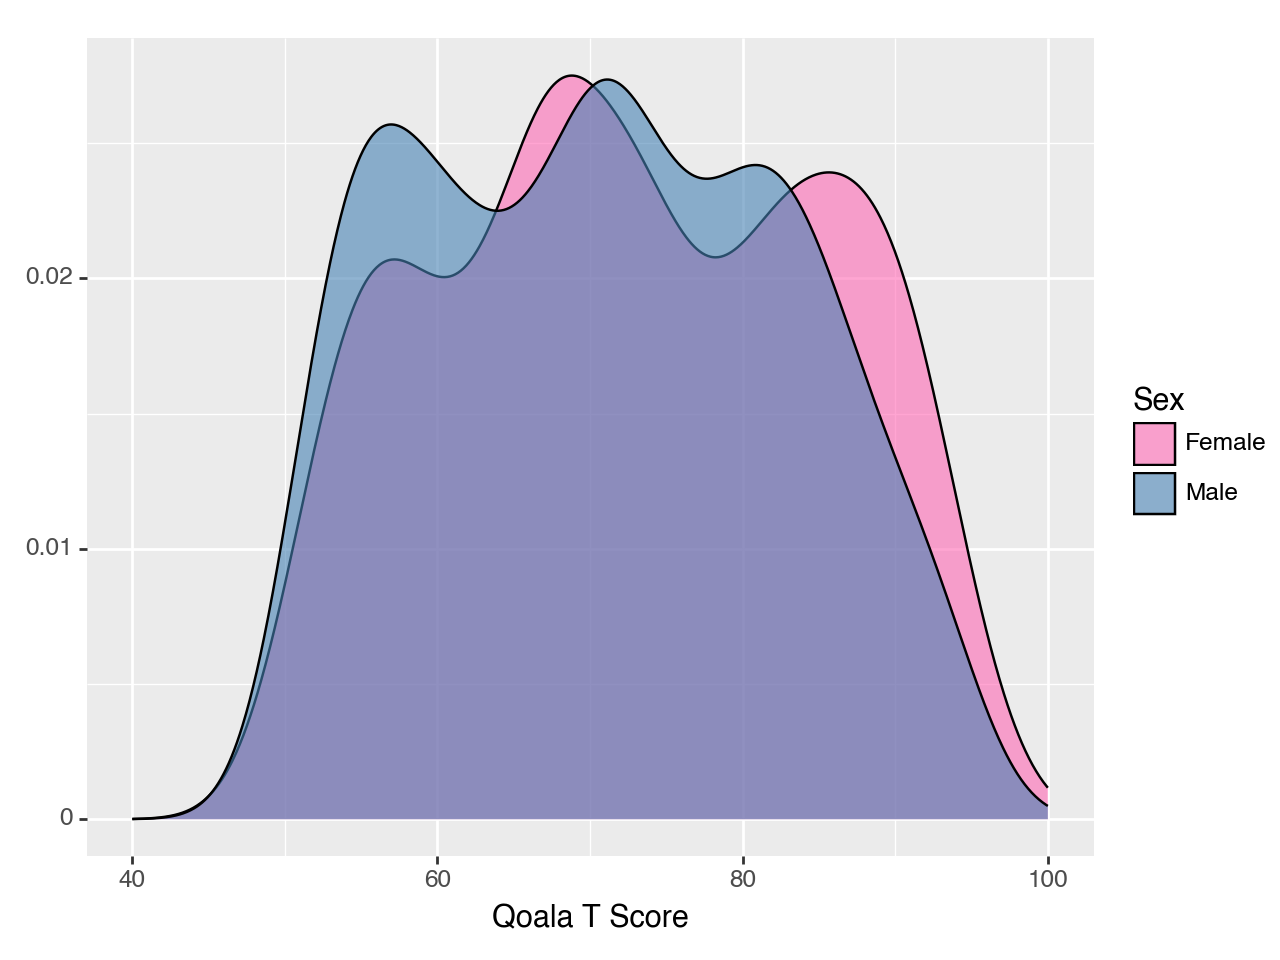

In [43]:
ggplot = (
    p9.ggplot(df, p9.aes(x="qoala_t_score", y="..density..", fill="sex"))
    + p9.geom_density(alpha=0.6)
    + p9.scale_fill_manual(values=["#FF69B4", "#4682B4"])
    #+ p9.theme_void()
    + p9.labs(x="Qoala T Score", y="", fill="Sex")  # Set y-axis label to empty string
    + p9.xlim(40, 100)
)
print(ggplot)

/Users/waigwa/Documents/neptune/neptune/lib/python3.9/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 378 rows containing non-finite values.


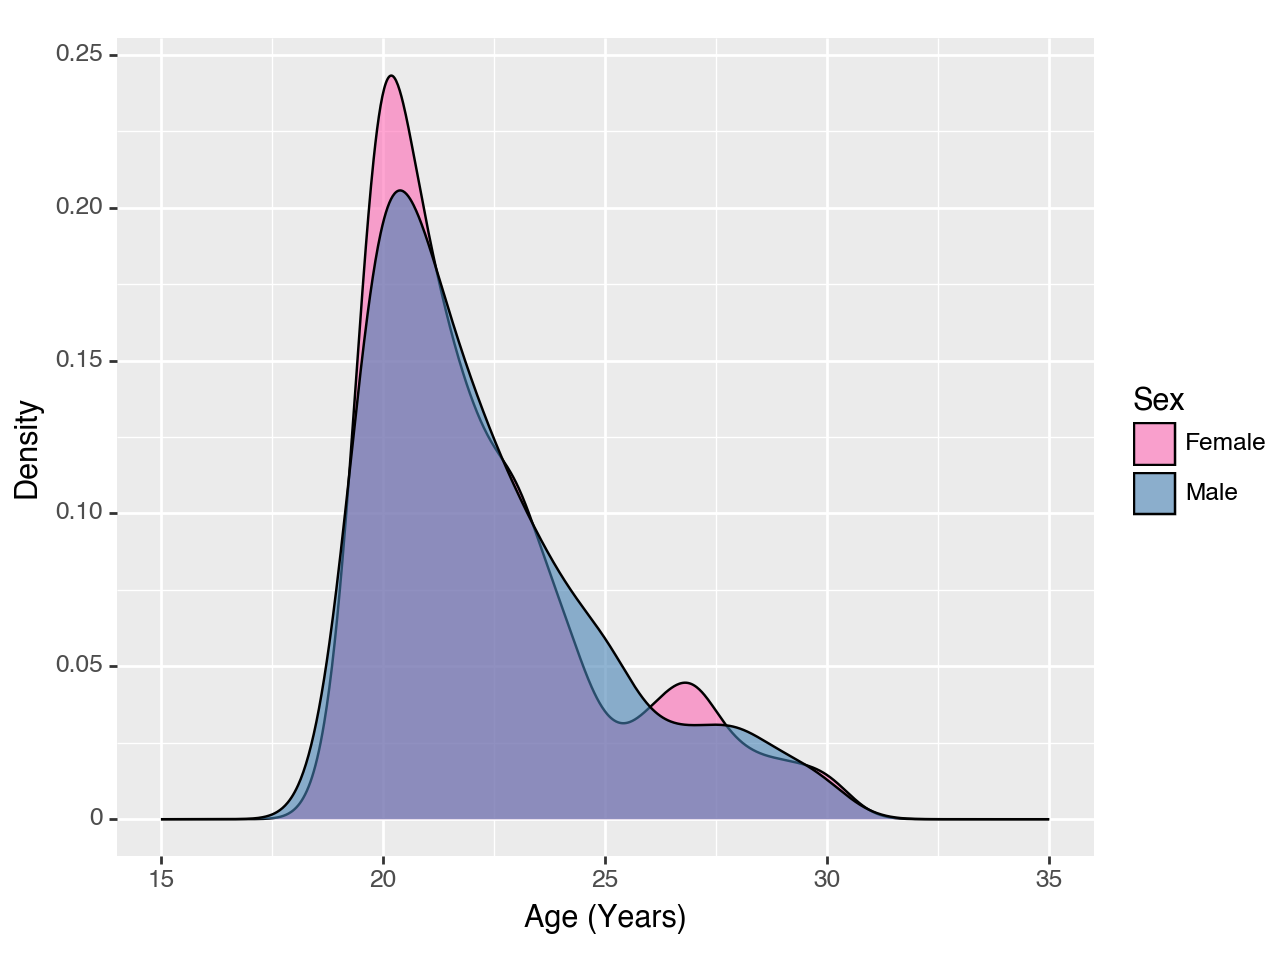

In [44]:
ggplot = (
    p9.ggplot(df, p9.aes(x="scan_age", y="..density..", fill="sex"))
    + p9.geom_density(alpha=0.6)
    + p9.scale_fill_manual(values=["#FF69B4", "#4682B4"])
    #+ p9.theme_void()
    + p9.labs(x="Age (Years)", y="Density", fill="Sex")  # Set y-axis label to empty string
    + p9.xlim(15, 35)
)
print(ggplot)

#### Partition into training and validation

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# bin the target variable into discrete bins
bins = 10
binned_target = pd.cut(df['scan_age'], bins=bins, labels=False)

In [47]:

# split the data into training and validation sets, stratifying by the binned target
X_train, X_val, y_train, y_val = train_test_split(df.drop('scan_age', axis=1), df['scan_age'], 
                                                    test_size=0.2, random_state=42, stratify=binned_target)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (1029, 191) (1029,)
Validation set shape: (258, 191) (258,)


In [48]:
X_train['split'] = 'TRAIN'
X_val['split'] = 'VALIDATE'


In [49]:
merged_train = X_train.join(y_train)
merged_val = X_val.join(y_val)

In [50]:
merged_val.head()

dataset  fs_3rdvent_vol  fs_4thvent_vol  fs_brainseg_vol  \
2575    ping           851.3          1461.3        1106075.0   
2035    corr          1184.1          2061.2        1241918.0   
1353    corr           938.7          1538.3        1293168.0   
2278    corr           836.3          1717.1        1142901.0   
1421    corr           854.7          2867.3        1036577.0   

      fs_brainseg_vol_no_vent  fs_brainseg_vol_no_vent_surf  \
2575                1091555.0                  1.091641e+06   
2035                1219467.0                  1.218636e+06   
1353                1277331.0                  1.277723e+06   
2278                1127921.0                  1.127491e+06   
1421                1019226.0                  1.018844e+06   

      fs_brainsegvol_etiv_ratio  fs_brainstem_vol  fs_cc_anterior_vol  \
2575                   0.787237           14085.9               656.9   
2035                   0.811627           17352.6              1136.8   
1353                   0.780097           22237.0              1090.4   
2278                   0.770922           19475.2               620.8   
1421                   0.814415           18090.5               649.2   

      fs_cc_central_vol  fs_cc_midanterior_vol  fs_cc_midposterior_vol  \
2575              473.8                  329.8                   302.3   
2035              741.4                  534.0                   531.0   
1353              977.7                 1031.5                   762.7   
2278              527.5                  544.4                   534.5   
1421              391.2                  378.8                   483.5   

      fs_cc_posterior_vol  fs_csf_vol  fs_intercranial_vol  \
2575                669.6      1028.3         1.405010e+06   
2035               1070.4      1151.6         1.530159e+06   
1353               1291.8       945.1         1.657702e+06   
2278                949.4       854.0         1.482513e+06   
1421                728.5       882.5         1.272788e+06   

      fs_l_accumbensarea_vol  fs_l_amygdala_vol  fs_l_bankssts_area  \
2575                   567.2             1159.1               978.0   
2035                   404.5             1950.4              1278.0   
1353                   740.4             1631.3              1002.0   
2278                   429.7             1513.5              1054.0   
1421                   653.4             1565.6               963.0   

      fs_l_bankssts_grayvol  fs_l_caudalanteriorcingulate_area  \
2575                 2612.0                              476.0   
2035                 3174.0                              747.0   
1353                 2380.0                              540.0   
2278                 2692.0                              641.0   
1421                 2381.0                              561.0   

      fs_l_caudalanteriorcingulate_grayvol  fs_l_caudalmiddlefrontal_area  \
2575                                1733.0                         2423.0   
2035                                2354.0                         2423.0   
1353                                1815.0                         1887.0   
2278                                1972.0                         2162.0   
1421                                1690.0                         1831.0   

      fs_l_caudalmiddlefrontal_grayvol  fs_l_caudate_vol  \
2575                            8392.0            3962.1   
2035                            7538.0            3813.4   
1353                            5809.0            4335.5   
2278                            6930.0            3400.1   
1421                            5046.0            3677.7   

      fs_l_cerebellum_cort_vol  fs_l_cerebellum_wm_vol  \
2575                   49223.4                 16175.7   
2035                   58176.8                 13718.7   
1353                   59416.2                 15006.3   
2278                   56776.2                 15737.6   
1421                   58780.6          

In [51]:
merged_train.shape, merged_val.shape

((1029, 193), (258, 193))

In [52]:
df_train = pd.concat([merged_train, merged_val])

In [53]:
df_train.scan_age.describe()

count    1287.000000
mean       17.870407
std         7.269210
min         3.250000
25%         8.662503
50%        20.250000
75%        22.970000
max        30.000000
Name: scan_age, dtype: float64

In [54]:
df_orig = pd.read_csv(f"{here()}/data/train/df_train_partitioned.csv")

In [55]:
df_orig.head()

scan_id  fs_subcort_gm_vol  fs_brainseg_vol  qoala_t_score dataset  \
0  NDARDH086ZKK            53157.0        1012956.0      69.860279     cmi   
1  NDARJY676CWZ            54225.0        1063862.0      85.029940     cmi   
2  NDARWR247CE1            54564.0        1070217.0      85.628743     cmi   
3  NDARCG808HDJ            57996.0        1134609.0      68.662675     cmi   
4  NDARDY776AKH            53375.0        1065964.0      85.029940     cmi   

    scan_age     sex  fs_3rdvent_vol  fs_4thvent_vol  fs_brainseg_vol_no_vent  \
0   9.488364  Female           490.7          1319.1                  1004153   
1  11.823636    Male           635.1          2446.1                  1054026   
2  16.496691  Female           564.8          1266.8                  1059740   
3   9.477412  Female           947.1          2445.3                  1122434   
4  16.444672  Female           790.2          1880.7                  1052814   

   fs_brainseg_vol_no_vent_surf  fs_brainsegvol_etiv_ratio  fs_brainstem_vol  \
0                  1.004113e+06                   0.845934           15847.5   
1                  1.053512e+06                   0.799531           19408.5   
2                  1.059403e+06                   0.763461           17470.4   
3                  1.122223e+06                   0.803014           17226.9   
4                  1.052473e+06                   0.752452           18234.6   

   fs_cc_anterior_vol  fs_cc_central_vol  fs_cc_midanterior_vol  \
0               723.2              596.2                  480.5   
1               808.7              503.1                  674.4   
2               846.2              669.7                  680.3   
3               699.7              599.7                  421.4   
4               725.4              648.3                  695.8   

   fs_cc_midposterior_vol  fs_cc_posterior_vol  fs_csf_vol  \
0                   434.7                746.9       656.1   
1                   378.2                824.2       872.0   
2                   543.0                954.5       863.9   
3                   327.8                649.3       995.4   
4                   338.0                674.3       960.4   

   fs_intercranial_vol  fs_l_accumbensarea_vol  fs_l_amygdala_vol  \
0         1.197441e+06                   529.5             1382.8   
1         1.330608e+06                   522.3             1563.1   
2         1.401797e+06                   514.3             1506.6   
3         1.412938e+06                   575.8             1608.5   
4         1.416654e+06                   548.9             1520.9   

   fs_l_bankssts_area  fs_l_bankssts_grayvol  \
0                 980                   3048   
1                 963                   2724   
2                 993                   2505   
3                1017                   2953   
4                 802                   2487   

   fs_l_caudalanteriorcingulate_area  fs_l_caudalanteriorcingulate_grayvol  \
0                                658                                  2180   
1                                464                                  1291   
2                                588                                  1951   
3                                683                                  2209   
4                                593                                  1962   

   fs_l_caudalmiddlefrontal_area  fs_l_caudalmiddlefrontal_grayvol  \
0                           2012                              6553   
1                           1986                              6583   
2                           2317                              7806   
3                           2643                              8961   
4                           2232                              7081   

   fs_l_caudate_vol  fs_l_cerebellum_cort_vol  fs_l_cerebellum_wm_vol  \
0            3705.8                   45784.0                 11128.4   
1            3332.1                   56192.7          

In [56]:
df_train.head()

dataset  fs_3rdvent_vol  fs_4thvent_vol  fs_brainseg_vol  \
1336    corr           992.6          1396.0        1188616.0   
2025    corr           866.3          1454.5        1191446.0   
2675    ping           652.4          1896.2        1345447.0   
2681    ping           716.7          1400.4        1002158.0   
2664    ping           734.1          1200.9        1096275.0   

      fs_brainseg_vol_no_vent  fs_brainseg_vol_no_vent_surf  \
1336                1169764.0                  1.170105e+06   
2025                1180553.0                  1.179284e+06   
2675                1335622.0                  1.335408e+06   
2681                 990010.0                  9.898922e+05   
2664                1082489.0                  1.082476e+06   

      fs_brainsegvol_etiv_ratio  fs_brainstem_vol  fs_cc_anterior_vol  \
1336                   0.756788           19958.4               829.5   
2025                   0.850429           18681.2               775.3   
2675                   0.800306           22435.4               747.4   
2681                   0.803306           17841.4               787.6   
2664                   0.922755           18585.5               826.8   

      fs_cc_central_vol  fs_cc_midanterior_vol  fs_cc_midposterior_vol  \
1336              554.0                  446.9                   519.1   
2025              786.3                  688.1                   599.9   
2675              727.8                  560.4                   584.8   
2681              428.4                  473.6                   503.8   
2664              431.6                  372.3                   434.3   

      fs_cc_posterior_vol  fs_csf_vol  fs_intercranial_vol  \
1336                974.0      1213.7         1.570606e+06   
2025                999.2       804.4         1.400993e+06   
2675                884.1       683.1         1.681165e+06   
2681                836.1       892.5         1.247542e+06   
2664                871.2       922.4         1.188046e+06   

      fs_l_accumbensarea_vol  fs_l_amygdala_vol  fs_l_bankssts_area  \
1336                   587.3             1537.4              1091.0   
2025                   441.5             1594.9              1036.0   
2675                   581.1             1901.4              1053.0   
2681                   596.5             1699.8               894.0   
2664                   688.1             1762.3              1226.0   

      fs_l_bankssts_grayvol  fs_l_caudalanteriorcingulate_area  \
1336                 2588.0                              823.0   
2025                 2342.0                              579.0   
2675                 3400.0                              870.0   
2681                 2360.0                              452.0   
2664                 3155.0                              624.0   

      fs_l_caudalanteriorcingulate_grayvol  fs_l_caudalmiddlefrontal_area  \
1336                                2302.0                         2968.0   
2025                                1663.0                         2564.0   
2675                                3167.0                         2698.0   
2681                                1182.0                         1685.0   
2664                                2061.0                         2271.0   

      fs_l_caudalmiddlefrontal_grayvol  fs_l_caudate_vol  \
1336                            8423.0            3666.6   
2025                            7984.0            3373.5   
2675                            8947.0            4431.1   
2681                            3968.0            2905.1   
2664                            6197.0            3293.4   

      fs_l_cerebellum_cort_vol  fs_l_cerebellum_wm_vol  \
1336                   49194.0                 13547.0   
2025                   54089.8                 16711.3   
2675                   65232.4                 13039.7   
2681                   53869.3                 14427.1   
2664                   47307.4          

In [57]:
df_train.shape, df_orig.shape

((1287, 193), (1601, 193))

In [58]:
df_orig.scan_age.describe()

count    1601.000000
mean       13.477591
std         3.023342
min         9.000000
25%        10.960000
50%        13.000000
75%        15.916667
max        19.000000
Name: scan_age, dtype: float64

In [59]:
df = pd.concat([df_orig, df_train])

In [60]:
# rename the rows using a dictionary
mapping = {'cmi': 'CMI', 'abide': 'ABIDE', 'abide2': 'ABIDE II', 'nih': 'NIH', 'corr': 'CORR', 'ping': 'PING'}
df['dataset'] = df['dataset'].map(mapping)


In [61]:
df.shape

(2888, 193)

In [62]:
df.sample(3)

scan_id  fs_subcort_gm_vol  fs_brainseg_vol  qoala_t_score dataset  \
1822   27121            60603.0        1183571.0      70.658683    CORR   
1032   25153            56711.0        1192124.0      67.265469    CORR   
2014   27184            59606.0        1162910.0      93.812375    CORR   

      scan_age   sex  fs_3rdvent_vol  fs_4thvent_vol  fs_brainseg_vol_no_vent  \
1822     23.00  Male           992.8          1842.4                1152361.0   
1032     11.34  Male           592.8          1915.4                1181488.0   
2014     21.00  Male          1026.9          1533.6                1150209.0   

      fs_brainseg_vol_no_vent_surf  fs_brainsegvol_etiv_ratio  \
1822                  1.152156e+06                   0.735793   
1032                  1.181360e+06                   0.835029   
2014                  1.150009e+06                   0.753413   

      fs_brainstem_vol  fs_cc_anterior_vol  fs_cc_central_vol  \
1822           18875.3               725.6              444.3   
1032           17396.4              1022.6              568.4   
2014           20068.0               835.0              696.6   

      fs_cc_midanterior_vol  fs_cc_midposterior_vol  fs_cc_posterior_vol  \
1822                  425.3                   413.1                852.4   
1032                  869.5                   498.3                895.9   
2014                  638.5                   632.5                821.5   

      fs_csf_vol  fs_intercranial_vol  fs_l_accumbensarea_vol  \
1822      1020.0         1.608565e+06                   588.6   
1032       823.5         1.427644e+06                   668.6   
2014       834.7         1.543522e+06                   451.8   

      fs_l_amygdala_vol  fs_l_bankssts_area  fs_l_bankssts_grayvol  \
1822             1342.4              1143.0                 2880.0   
1032             1331.0              1453.0                 3495.0   
2014             1645.2               813.0                 1896.0   

      fs_l_caudalanteriorcingulate_area  fs_l_caudalanteriorcingulate_grayvol  \
1822                              548.0                                1549.0   
1032                              627.0                                1890.0   
2014                              536.0                                1660.0   

      fs_l_caudalmiddlefrontal_area  fs_l_caudalmiddlefrontal_grayvol  \
1822                         2690.0                            8759.0   
1032                         2561.0                            8171.0   
2014                         2070.0                            6630.0   

      fs_l_caudate_vol  fs_l_cerebellum_cort_vol  fs_l_cerebellum_wm_vol  \
1822            3724.1                   57919.5                 13804.9   
1032            3724.7                   53864.6                 12020.8   
2014            3230.3                   55193.2                 14330.1   

      fs_l_choroidplexus_vol  fs_l_cuneus_area  fs_l_cuneus_grayvol  \
1822                   694.2            1308.0               2805.0   
1032                   461.5            1632.0               3659.0   
2014                   275.9            1447.0               2908.0   

      fs_l_entorhinal_area  fs_l_entorhinal_grayvol  fs_l_frontalpole_area  \
1822                 406.0                   2080.0                  259.0   
1032                 354.0                   1763.0                  279.0   
2014                 434.0                   1690.0                  240.0   

      fs_l_frontalpole_grayvol  fs_l_fusiform_area  fs_l_fusiform_grayvol  \
1822                    1177.0              3419.0                10149.0   
1032                    1242.0              3109.0                10272.0   
2014                    1137.0              3187.0                10584.0   

      fs_l_hippo_vol  fs_l_inferiorparietal_area  \
1822          3975.3                      5310.0   
1032          3720.5                      4634.0   
2014          3947.4    

#### Drop PING participants with ADHD diagnosis

In [63]:
df = df.drop(df[df['scan_id'].isin(['P0778', 'P0598', 'P1012', 'P0851'])].index)

In [64]:
df.shape

(2884, 193)

In [65]:
df.split.value_counts()

split
TRAIN       2308
VALIDATE     576
Name: count, dtype: int64

In [66]:
df.sex.value_counts()

sex
Male      1557
Female    1327
Name: count, dtype: int64

In [67]:
df_site = df[['scan_age', 'sex', 'dataset', 'split']]
df_site.groupby(['sex', 'split'], as_index=True).describe()

scan_age                                                       \
                   count       mean       std       min        25%        50%   
sex    split                                                                    
Female TRAIN      1073.0  15.572680  5.895286  3.250000  10.405087  15.000000   
       VALIDATE    254.0  15.559309  5.749730  4.583333  10.437500  15.299338   
Male   TRAIN      1235.0  15.299671  5.688949  3.416667  10.827329  14.583333   
       VALIDATE    322.0  15.342989  5.761685  3.250000  10.683175  14.708333   

                             
                  75%   max  
sex    split                 
Female TRAIN     20.0  30.0  
       VALIDATE  20.0  30.0  
Male   TRAIN     20.0  30.0  
       VALIDATE  20.0  29.5

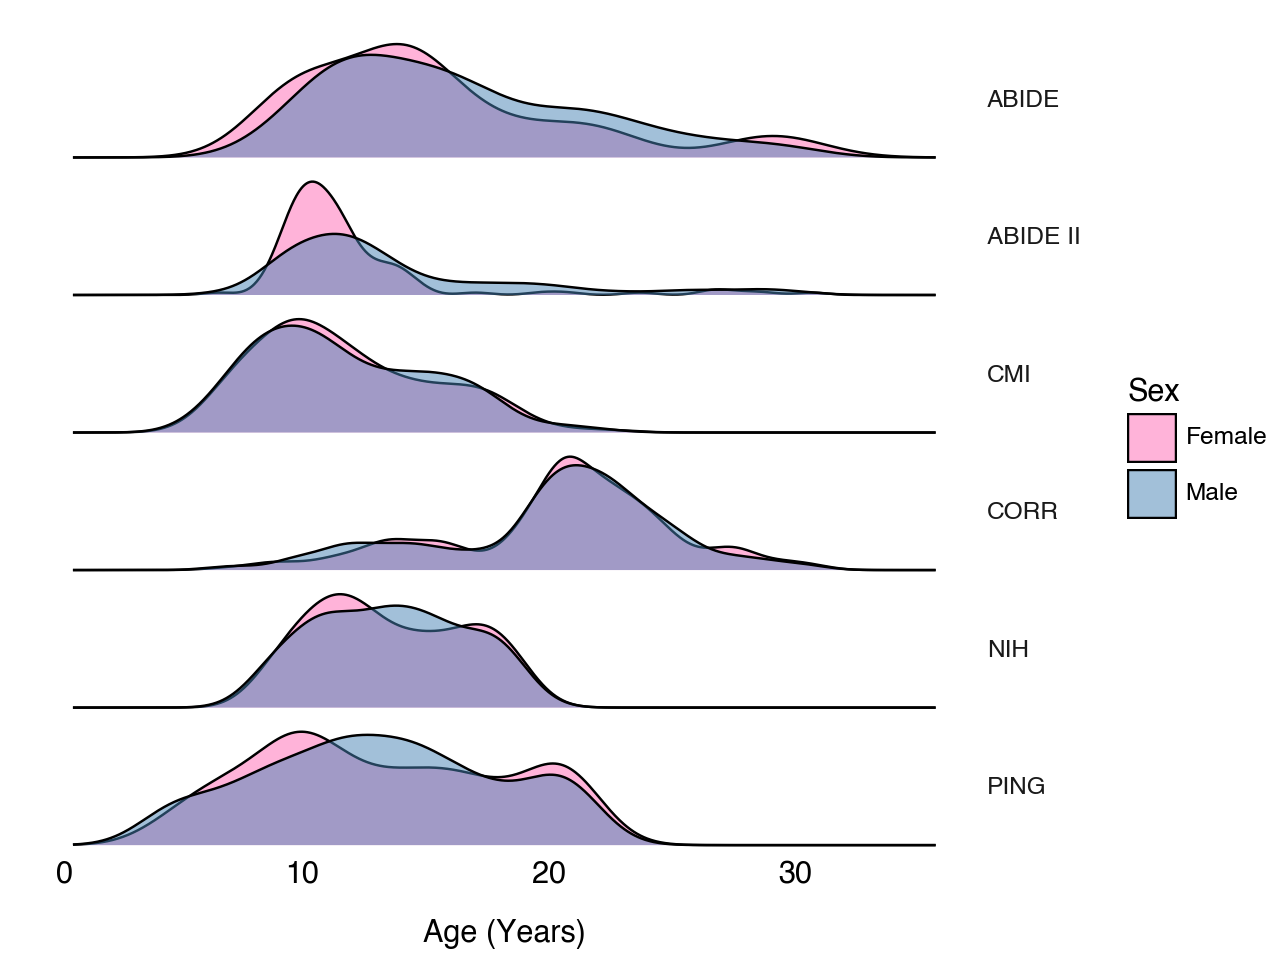

In [70]:
# Create a ridgeline plot
ggplot = (
    p9.ggplot(df, p9.aes(x="scan_age", y="..density..", fill="sex"))
    + p9.geom_density(alpha=0.5)
    + p9.facet_grid("dataset ~ .", scales="free", space="free")
    + p9.scale_fill_manual(values=["#FF69B4", "#4682B4"])
    + p9.theme_void()
    + p9.theme(
        axis_text_x=p9.element_text(angle=0, hjust=1, margin={'t': 5}),
        axis_title_x=p9.element_text(vjust=-0.5),
        axis_title_y=p9.element_blank(),  # Remove y-axis label
        legend_title=p9.element_text(vjust=0.5),
        legend_position="right",
        strip_text_y=p9.element_text(angle=0, ha="right", va="center"),
    )
    + p9.labs(x="Age (Years)", y="", fill="Sex")  # Set y-axis label to empty string
    + p9.xlim(0, 35)  # Set x-axis limits to 5-25
)
print(ggplot)


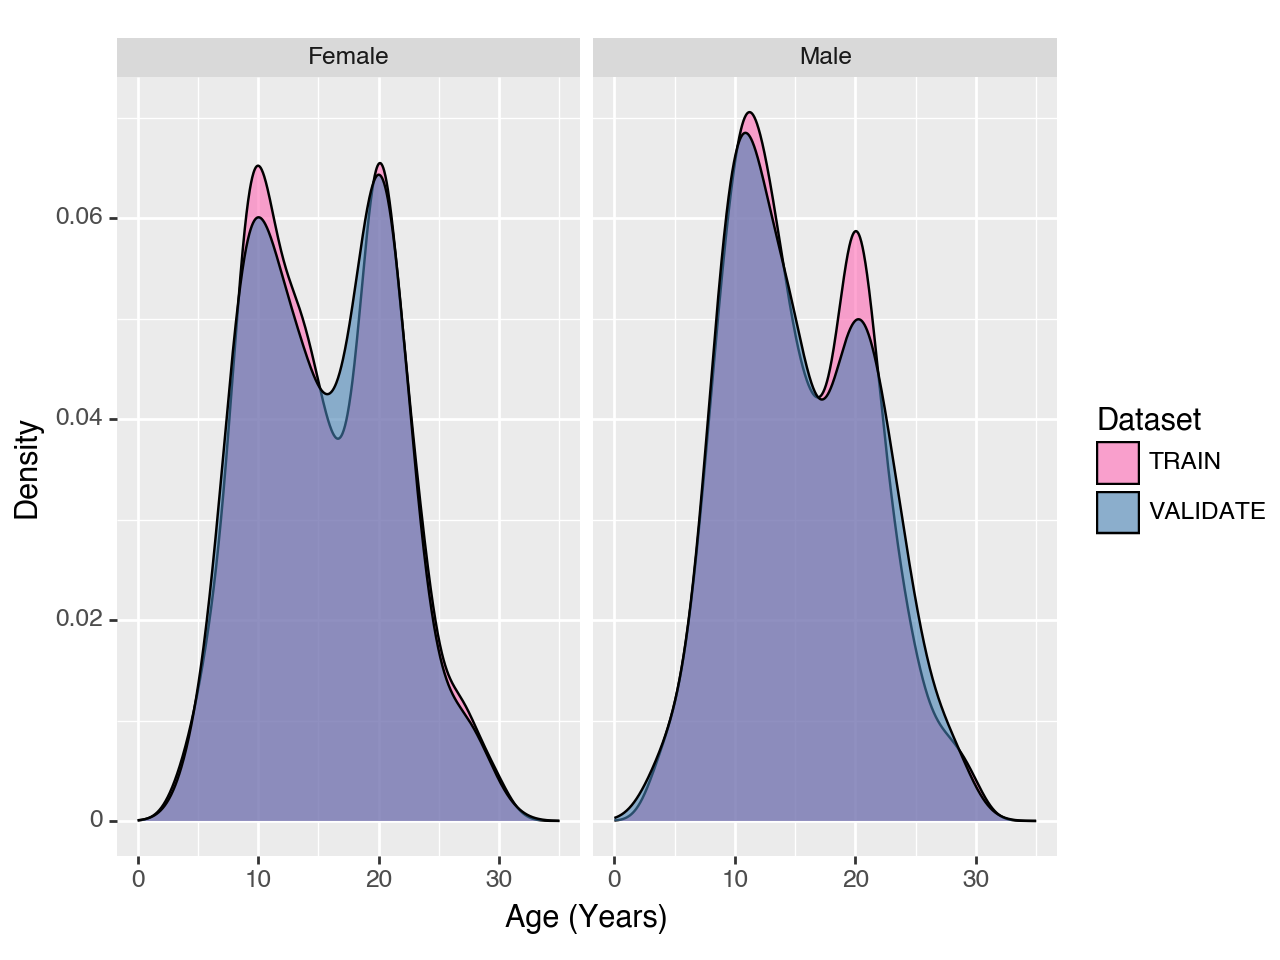

In [75]:
ggplot = (
    p9.ggplot(df, p9.aes(x="scan_age", y="..density..", fill="split"))
    + p9.geom_density(alpha=0.6)
    + p9.scale_fill_manual(values=["#FF69B4", "#4682B4"])
    + p9.labs(x="Age (Years)", y="Density", fill="Dataset")
    + p9.xlim(0, 35)
    + p9.facet_wrap("sex", ncol=2)
)
print(ggplot)

#### Descriptive stats for train data

In [76]:
df.shape

(2884, 193)

In [77]:
df.split.value_counts()

split
TRAIN       2308
VALIDATE     576
Name: count, dtype: int64

In [75]:
df_desc = df[['sex', 'split', 'dataset', 'scan_age']]
df_desc.groupby(['dataset', 'sex'], as_index=True).describe()
#data.dataset.value_counts()

scan_age                                                       \
                   count       mean       std       min        25%        50%   
dataset  sex                                                                    
ABIDE    Female     80.0  14.830794  5.667218  7.750200  10.745000  13.765000   
         Male      267.0  15.668677  5.279662  7.000000  11.610000  14.660000   
ABIDE II Female    120.0  11.320016  4.066218  5.907000   9.221918  10.034247   
         Male      222.0  13.156302  5.176676  5.887000   9.664041  11.271233   
CMI      Female    130.0  11.041064  3.518083  5.053159   8.446725  10.424195   
         Male      145.0  11.070718  3.579990  5.203627   8.371206  10.369838   
CORR     Female    579.0  19.693316  4.613364  6.000000  18.000000  20.000000   
         Male      515.0  19.429379  4.729184  6.000000  17.465000  20.000000   
NIH      Female     97.0  12.876289  3.055929  8.000000  10.000000  12.000000   
         Male       73.0  12.904110  2.991490  8.000000  10.000000  13.000000   
PING     Female    321.0  12.554258  4.992575  3.250000   8.666667  11.916667   
         Male      335.0  12.471393  4.814039  3.250000   8.791667  12.500000   

                                       
                       75%        max  
dataset  sex                           
ABIDE    Female  17.227500  30.000000  
         Male    19.279000  30.000000  
ABIDE II Female  11.683562  30.000000  
         Male    14.850000  29.500000  
CMI      Female  13.456878  21.482318  
         Male    13.895847  21.189368  
CORR     Female  22.445000  30.000000  
         Male    22.000000  30.000000  
NIH      Female  16.000000  18.000000  
         Male    15.000000  18.000000  
PING     Female  16.750000  21.000000  
         Male    16.166667  21.000000

In [76]:
df.scan_age.describe()

count    2884.000000
mean       15.428948
std         5.778422
min         3.250000
25%        10.637534
50%        14.888227
75%        20.000000
max        30.000000
Name: scan_age, dtype: float64

/Users/waigwa/Documents/neptune/neptune/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.


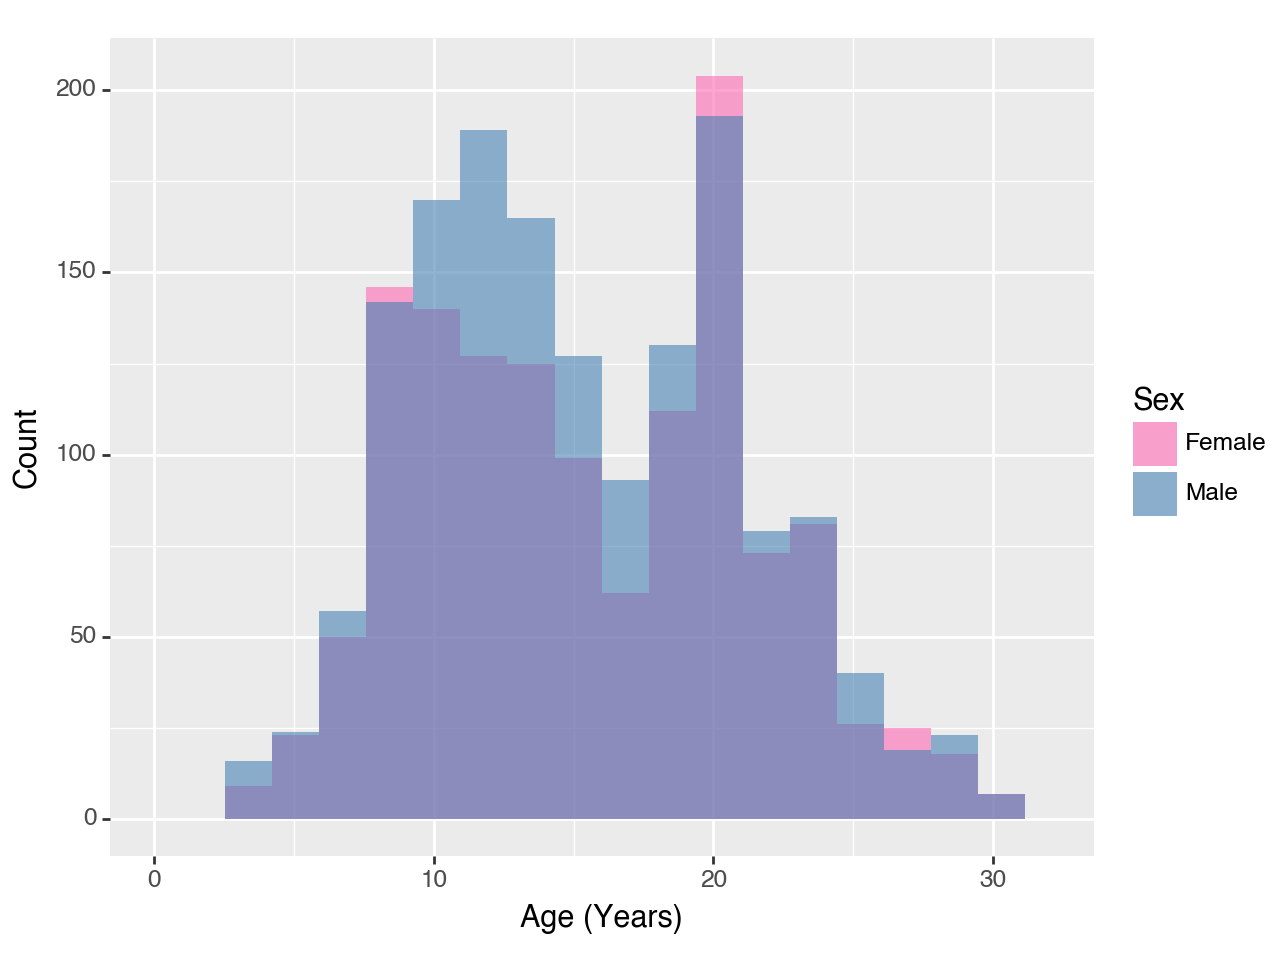

In [77]:
ggplot = (
    p9.ggplot(df, p9.aes(x="scan_age", fill="sex"))
    + p9.geom_histogram(alpha=0.6, bins=20, position="identity")
    + p9.scale_fill_manual(values=["#FF69B4", "#4682B4"])
    + p9.labs(x="Age (Years)", y="Count", fill="Sex")
    + p9.xlim(0, 32)
)
print(ggplot)

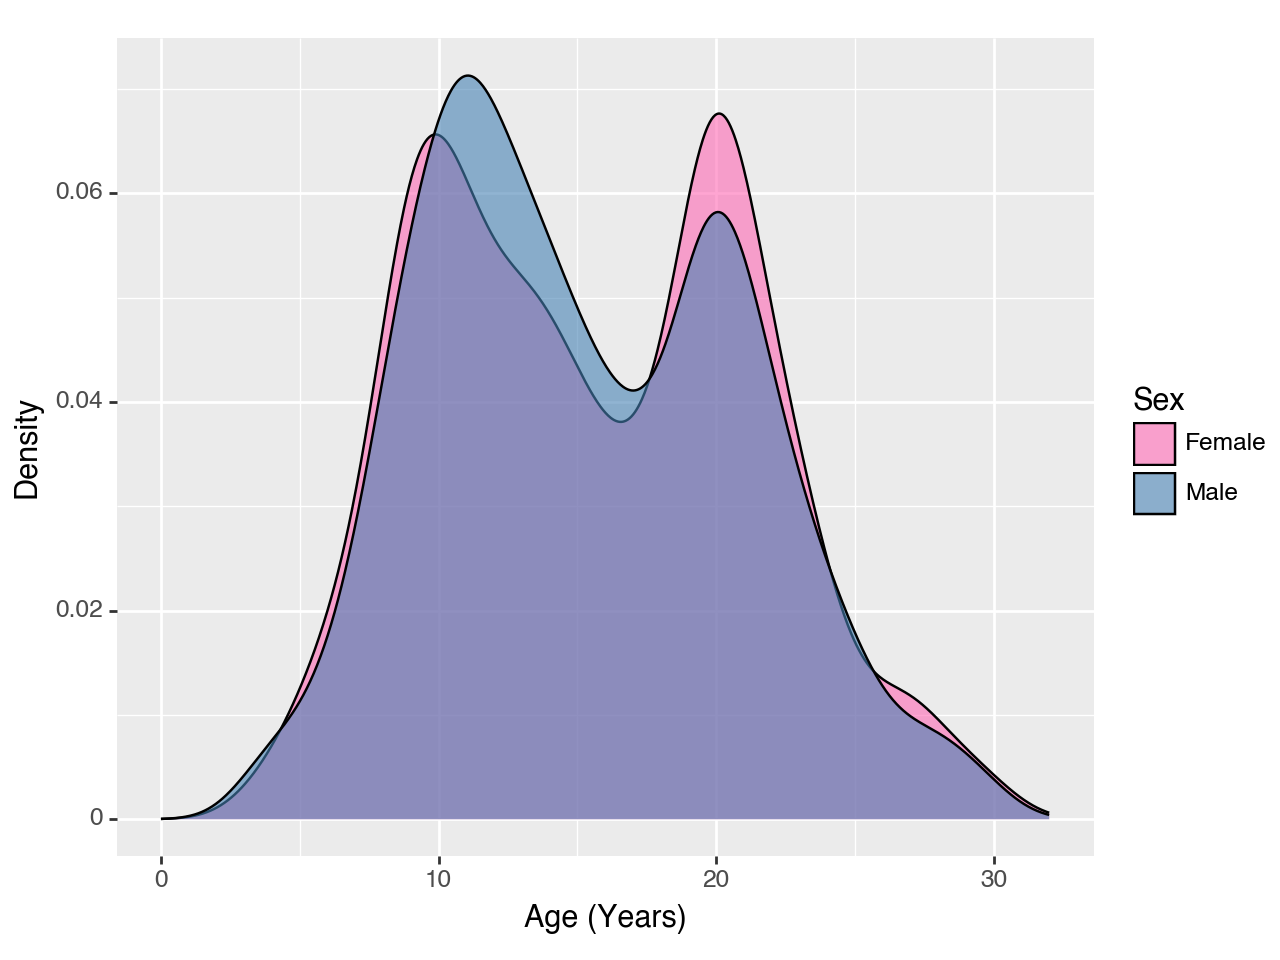

In [78]:
ggplot = (
    p9.ggplot(df, p9.aes(x="scan_age", fill="sex"))
    + p9.geom_density(alpha=0.6)
    + p9.scale_fill_manual(values=["#FF69B4", "#4682B4"])
    + p9.labs(x="Age (Years)", y="Density", fill="Sex")
    + p9.xlim(0, 32)
)
print(ggplot)

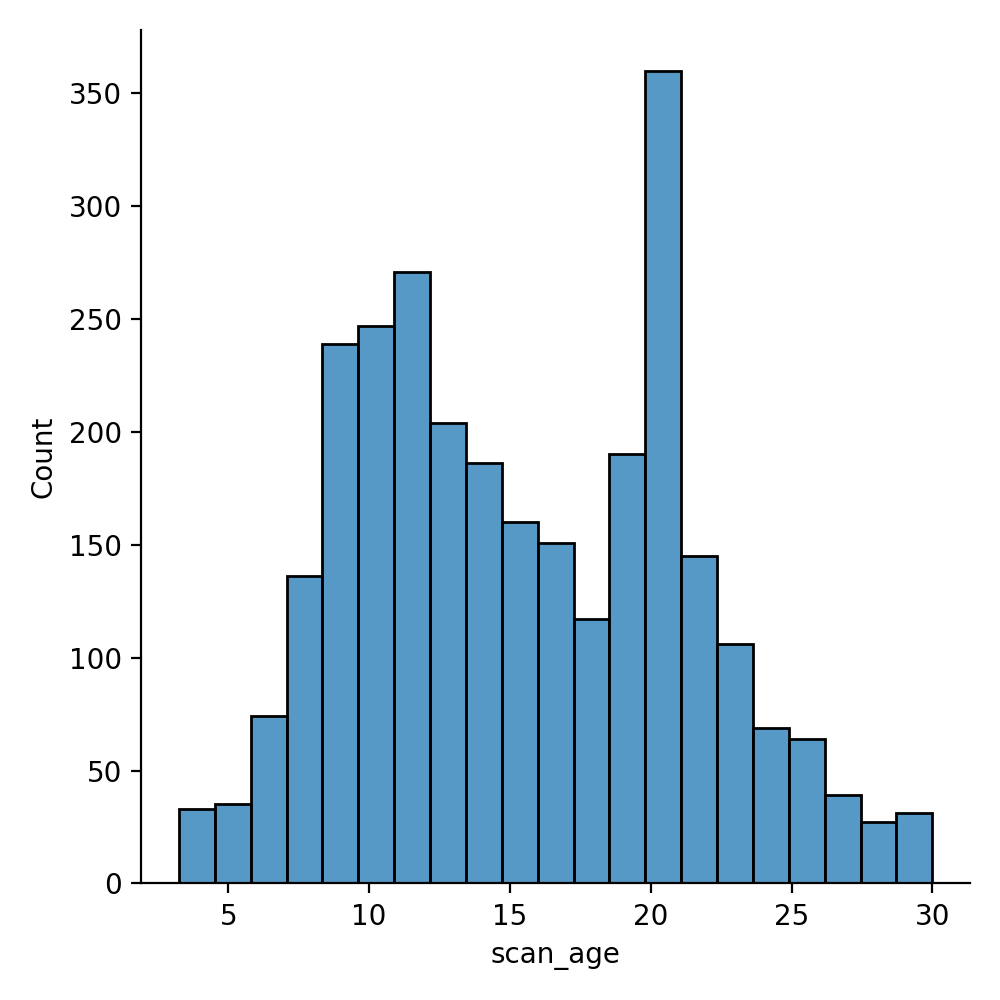

In [79]:
sns.displot(df.scan_age)
plt.show()

In [80]:
_df = df.query('19 < scan_age <= 20')

In [81]:
_df.sex.value_counts(), _df.shape, df.shape

(sex
 Female    129
 Male      109
 Name: count, dtype: int64,
 (238, 193),
 (2884, 193))

In [82]:
_df.split.value_counts()

split
TRAIN       188
VALIDATE     50
Name: count, dtype: int64

In [83]:
#n_rows_to_keep = 20
#df_balanced = _df.groupby(['sex', 'split']).apply(lambda x: x.sample(n_rows_to_keep)).reset_index(drop=True)

#print("\nBalanced DataFrame:")

In [84]:
#df_balanced.sex.value_counts()

In [85]:
#df.to_csv(f"{here()}/data/train/df_train_extended.csv", index=False)

#### Prep train data into train and validation

In [78]:
df = pd.read_csv(f"{here()}/data/train/df_train_extended.csv")

In [79]:
df.head()

scan_id  fs_subcort_gm_vol  fs_brainseg_vol  qoala_t_score dataset  \
0  NDARDH086ZKK            53157.0        1012956.0      69.860279     CMI   
1  NDARJY676CWZ            54225.0        1063862.0      85.029940     CMI   
2  NDARWR247CE1            54564.0        1070217.0      85.628743     CMI   
3  NDARCG808HDJ            57996.0        1134609.0      68.662675     CMI   
4  NDARDY776AKH            53375.0        1065964.0      85.029940     CMI   

    scan_age     sex  fs_3rdvent_vol  fs_4thvent_vol  fs_brainseg_vol_no_vent  \
0   9.488364  Female           490.7          1319.1                1004153.0   
1  11.823636    Male           635.1          2446.1                1054026.0   
2  16.496691  Female           564.8          1266.8                1059740.0   
3   9.477412  Female           947.1          2445.3                1122434.0   
4  16.444672  Female           790.2          1880.7                1052814.0   

   fs_brainseg_vol_no_vent_surf  fs_brainsegvol_etiv_ratio  fs_brainstem_vol  \
0                  1.004113e+06                   0.845934           15847.5   
1                  1.053512e+06                   0.799531           19408.5   
2                  1.059403e+06                   0.763461           17470.4   
3                  1.122223e+06                   0.803014           17226.9   
4                  1.052473e+06                   0.752452           18234.6   

   fs_cc_anterior_vol  fs_cc_central_vol  fs_cc_midanterior_vol  \
0               723.2              596.2                  480.5   
1               808.7              503.1                  674.4   
2               846.2              669.7                  680.3   
3               699.7              599.7                  421.4   
4               725.4              648.3                  695.8   

   fs_cc_midposterior_vol  fs_cc_posterior_vol  fs_csf_vol  \
0                   434.7                746.9       656.1   
1                   378.2                824.2       872.0   
2                   543.0                954.5       863.9   
3                   327.8                649.3       995.4   
4                   338.0                674.3       960.4   

   fs_intercranial_vol  fs_l_accumbensarea_vol  fs_l_amygdala_vol  \
0         1.197441e+06                   529.5             1382.8   
1         1.330608e+06                   522.3             1563.1   
2         1.401797e+06                   514.3             1506.6   
3         1.412938e+06                   575.8             1608.5   
4         1.416654e+06                   548.9             1520.9   

   fs_l_bankssts_area  fs_l_bankssts_grayvol  \
0               980.0                 3048.0   
1               963.0                 2724.0   
2               993.0                 2505.0   
3              1017.0                 2953.0   
4               802.0                 2487.0   

   fs_l_caudalanteriorcingulate_area  fs_l_caudalanteriorcingulate_grayvol  \
0                              658.0                                2180.0   
1                              464.0                                1291.0   
2                              588.0                                1951.0   
3                              683.0                                2209.0   
4                              593.0                                1962.0   

   fs_l_caudalmiddlefrontal_area  fs_l_caudalmiddlefrontal_grayvol  \
0                         2012.0                            6553.0   
1                         1986.0                            6583.0   
2                         2317.0                            7806.0   
3                         2643.0                            8961.0   
4                         2232.0                            7081.0   

   fs_l_caudate_vol  fs_l_cerebellum_cort_vol  fs_l_cerebellum_wm_vol  \
0            3705.8                   45784.0                 11128.4   
1            3332.1                   56192.7          

In [80]:
train = df[df['split'] == 'TRAIN']
val = df[df['split'] == 'VALIDATE']

In [81]:
df.shape, train.shape, val.shape

((2884, 193), (2308, 193), (576, 193))

In [82]:
train['scan_age'].describe()

count    2308.000000
mean       15.426594
std         5.786134
min         3.250000
25%        10.640407
50%        14.865000
75%        20.000000
max        30.000000
Name: scan_age, dtype: float64

In [83]:
X_traindf = pd.DataFrame(train)
Y_traindf = pd.DataFrame(train["scan_age"])
X_valdf = pd.DataFrame(val)
Y_valdf = pd.DataFrame(val["scan_age"])

In [84]:
X_traindf .shape, Y_traindf.shape, X_valdf.shape, Y_valdf.shape

((2308, 193), (2308, 1), (576, 193), (576, 1))

In [85]:
X_train = read_dataframe(X_traindf)
Y_train = Y_traindf.copy()
X_val = read_dataframe(X_valdf)
Y_val = Y_valdf.copy()  

(2308, 189)
(576, 189)


In [86]:
X_train_male = X_traindf[X_traindf['sex'] == 'Male']
Y_train_male = pd.DataFrame(X_train_male['scan_age'])
X_val_male = X_valdf[X_valdf['sex'] == 'Male']
Y_val_male = pd.DataFrame(X_val_male ['scan_age'])

X_train_female = X_traindf[X_traindf['sex'] == 'Female']
Y_train_female = pd.DataFrame(X_train_female['scan_age'])
X_val_female = X_valdf[X_valdf['sex'] == 'Female']
Y_val_female = pd.DataFrame(X_val_female['scan_age'])

In [88]:
df2 = df.copy()
df2.loc[df2['split'] == 'TRAIN', 'split'] = 'TRAINING'
df2.loc[df2['split'] == 'VALIDATE', 'split'] = 'VALIDATION'

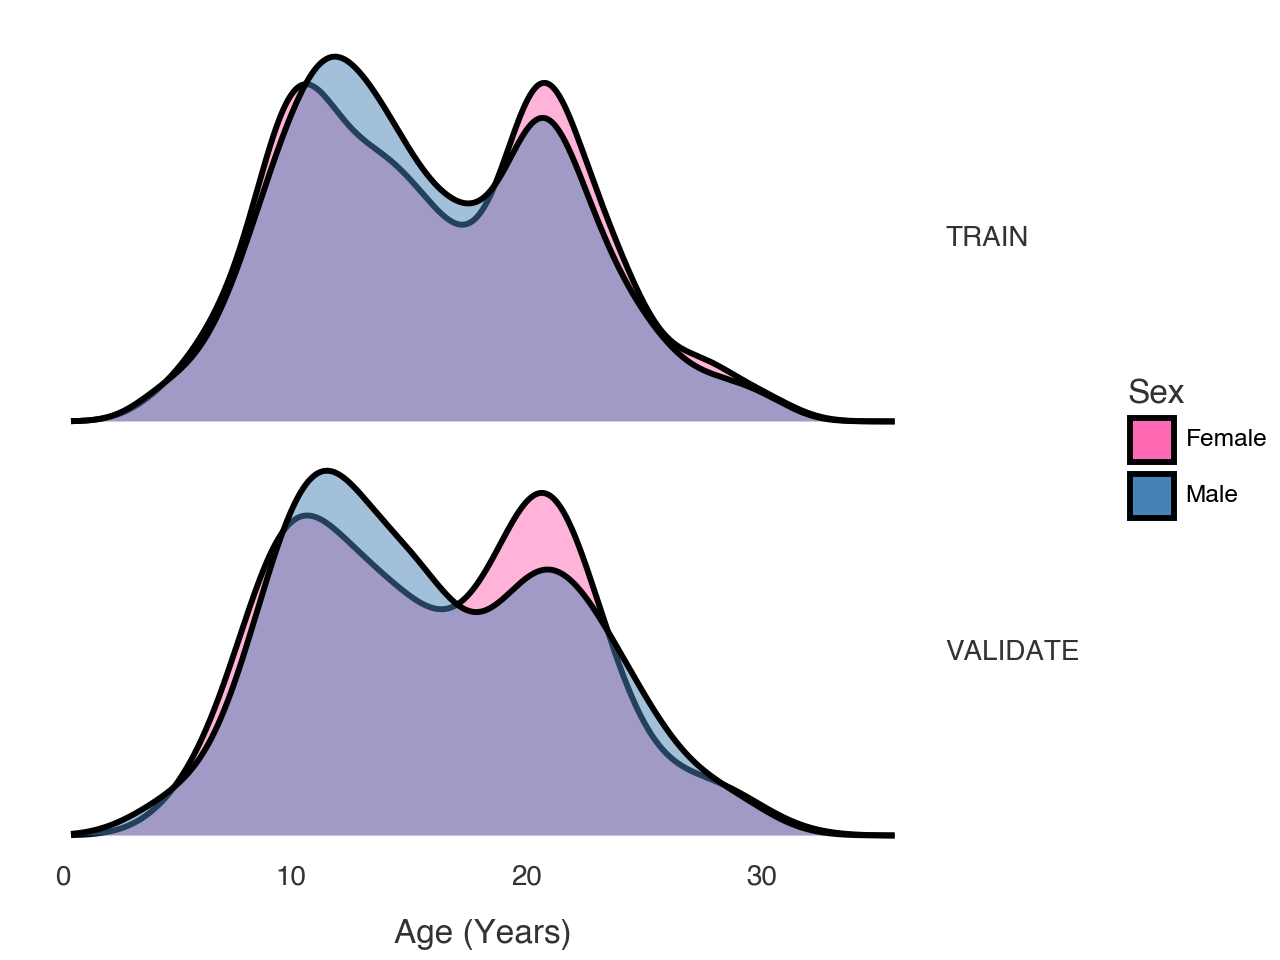

In [73]:
ggplot = (
    p9.ggplot(df, p9.aes(x="scan_age", y="..density..", fill="sex"))
    + p9.geom_density(alpha=0.5, size=1.2)  # Increased line size for better visibility
    + p9.facet_grid("split ~ .", scales="free", space="free")
    + p9.scale_fill_manual(values=["#FF69B4", "#4682B4"]) #["#66CCCC", "#FF99CC"])  # Pastel colors with good contrast
    + p9.theme_void()
    + p9.theme(
        axis_text_x=p9.element_text(angle=0, hjust=1, margin={'t': 5}, size=10, color="#333333"),
        axis_title_x=p9.element_text(vjust=-0.5, size=12, color="#333333"),
        axis_title_y=p9.element_blank(),  # Remove y-axis label
        legend_title=p9.element_text(vjust=0.5, size=12, color="#333333"),
        legend_position="right",
        strip_text_y=p9.element_text(angle=0, ha="right", va="center", size=10, color="#333333"),
        panel_background=p9.element_rect(fill="#FFFFFF"),  # White panel background
        plot_background=p9.element_rect(fill="#FFFFFF"),  # White plot background
        panel_grid_major=p9.element_blank(),  # Remove major grid lines
        panel_grid_minor=p9.element_blank()  # Remove minor grid lines
    )
    + p9.labs(x="Age (Years)", y="", fill="Sex")  # Set y-axis label to empty string
    + p9.xlim(0, 35)  # Set x-axis limits to 5-25
    + p9.guides(fill=p9.guide_legend(override_aes={"alpha": 1}))  # Solid legend colors
)
print(ggplot)

#ggplot.save("../figures/train_distribution.png", dpi=800)

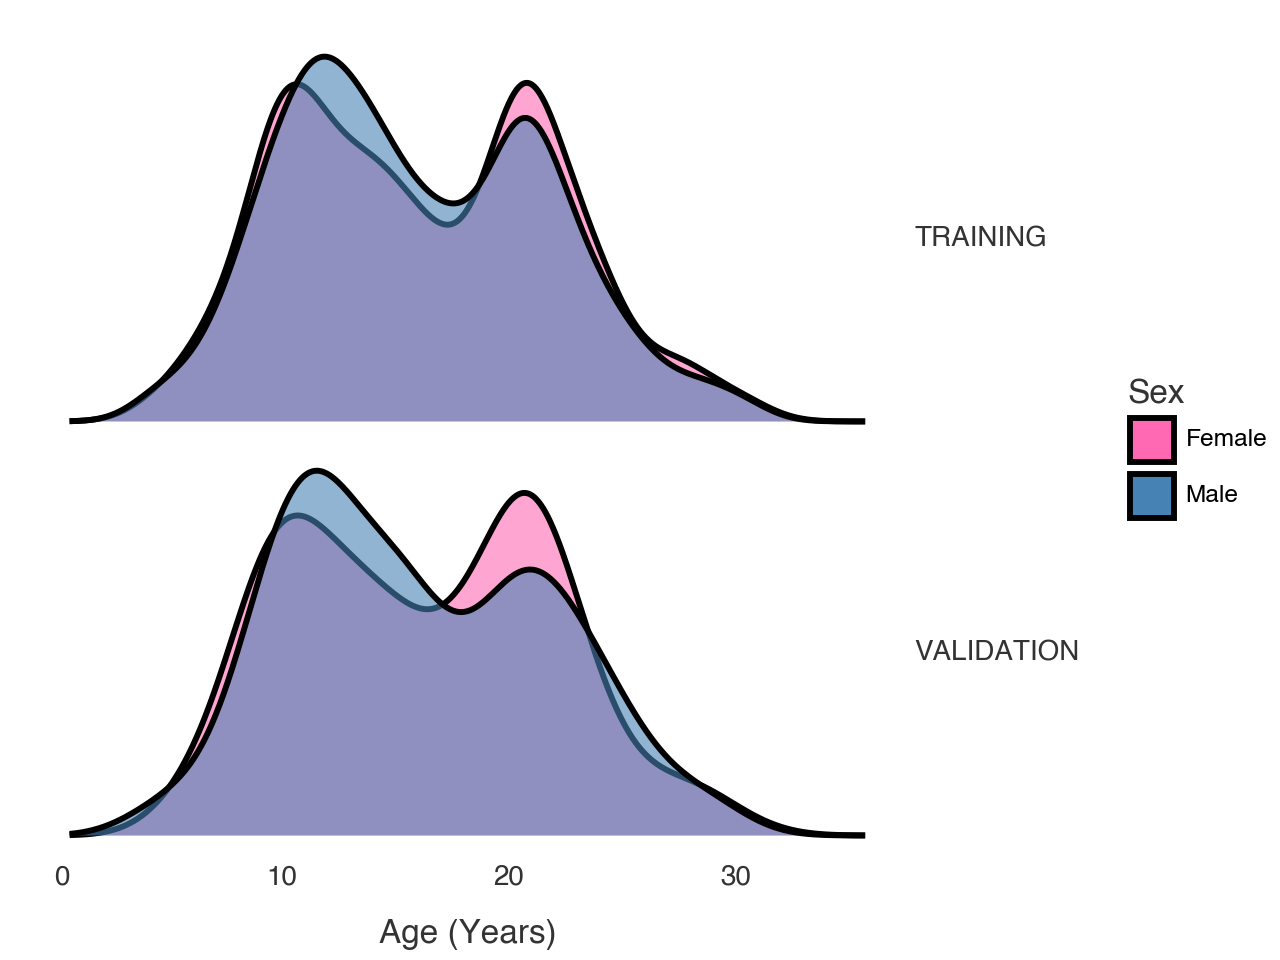

/Users/waigwa/Documents/neptune/neptune/lib/python3.9/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/waigwa/Documents/neptune/neptune/lib/python3.9/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/waigwa/Documents/neptune/figures/sobp_training_distribution.png


In [ ]:
ggplot = (
    p9.ggplot(df2, p9.aes(x="scan_age", y="..density..", fill="sex"))
    + p9.geom_density(alpha=0.3, size=1.2)  # Increased line size for better visibility
    + p9.facet_grid("split ~ .", scales="free", space="free")
    + p9.scale_fill_manual(values=["#FF69B4", "#4682B4"]) #["#66CCCC", "#FF99CC"])  # Pastel colors with good contrast
    + p9.theme_void()
    + p9.theme(
        axis_text_x=p9.element_text(angle=0, hjust=1, margin={'t': 5}, size=10, color="#333333"),
        axis_title_x=p9.element_text(vjust=-0.5, size=12, color="#333333"),
        axis_title_y=p9.element_blank(),  # Remove y-axis label
        legend_title=p9.element_text(vjust=0.5, size=12, color="#333333"),
        legend_position="right",
        strip_text_y=p9.element_text(angle=0, ha="right", va="center", size=10, color="#333333"),
        panel_background=p9.element_rect(fill="#FFFFFF"),  # White panel background
        plot_background=p9.element_rect(fill="#FFFFFF"),  # White plot background
        panel_grid_major=p9.element_blank(),  # Remove major grid lines
        panel_grid_minor=p9.element_blank()  # Remove minor grid lines
    )
    + p9.labs(x="Age (Years)", y="", fill="Sex")  # Set y-axis label to empty string
    + p9.xlim(0, 35)  # Set x-axis limits to 5-25
    + p9.guides(fill=p9.guide_legend(override_aes={"alpha": 1}))  # Solid legend colors
)
print(ggplot)

#ggplot.save(f"{here()}/figures/sobp_training_distribution.png", dpi=800)

In [96]:
X_train_male.shape, Y_train_male.shape, X_val_male.shape, Y_val_male.shape

((1235, 193), (1235, 1), (322, 193), (322, 1))

In [97]:
X_train_female.shape, Y_train_female.shape, X_val_female.shape, Y_val_female.shape

((1073, 193), (1073, 1), (254, 193), (254, 1))

In [98]:
X_train_male = read_dataframe(X_train_male)
X_train_female = read_dataframe(X_train_female)

X_val_male = read_dataframe(X_val_male)
X_val_female = read_dataframe(X_val_female)

(1235, 189)
(1073, 189)
(322, 189)
(254, 189)


/Users/waigwa/Documents/neptune/src/prep_dataframe.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/waigwa/Documents/neptune/src/prep_dataframe.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/waigwa/Documents/neptune/src/prep_dataframe.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/waigwa/Documents/neptune/src/prep_dataframe.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [99]:
X_train.shape

(2308, 189)

In [100]:
X_train.drop(['scan_age', 'scan_id'], axis=1, inplace=True)
X_val.drop(['scan_age', 'scan_id'], axis=1, inplace=True)

X_train_male.drop(['scan_age', 'scan_id'], axis=1, inplace=True)
X_train_female.drop(['scan_age', 'scan_id'], axis=1, inplace=True)

X_val_male.drop(['scan_age', 'scan_id'], axis=1, inplace=True)
X_val_female.drop(['scan_age', 'scan_id'], axis=1, inplace=True)

In [101]:
X_train_male.shape, X_val_male.shape, X_train_female.shape, X_val_female.shape

((1235, 187), (322, 187), (1073, 187), (254, 187))

In [102]:
X_train = X_train.to_numpy() 
Y_train = Y_train.to_numpy()

X_train_male = X_train_male.to_numpy() 
Y_train_male = Y_train_male.to_numpy()
X_train_female = X_train_female.to_numpy() 
Y_train_female = Y_train_female.to_numpy() 

X_val = X_val.to_numpy() 
Y_val = Y_val.to_numpy()

X_val_male = X_val_male.to_numpy() 
Y_val_male = Y_val_male.to_numpy()
X_val_female = X_val_female.to_numpy() 
Y_val_female = Y_val_female.to_numpy() 

In [103]:
with open(f'{here()}/data/train/x_train_ext.pkl','wb') as f:
    pickle.dump(X_train, f)

with open(f'{here()}/data/train/y_train_ext.pkl','wb') as f:
    pickle.dump(Y_train, f)

with open(f'{here()}/data/train/x_train_male_ext.pkl','wb') as f:
    pickle.dump(X_train_male, f)

with open(f'{here()}/data/train/y_train_male_ext.pkl','wb') as f:
    pickle.dump(Y_train_male, f)

with open(f'{here()}/data/train/x_train_female_ext.pkl','wb') as f:
    pickle.dump(X_train_female, f)

with open(f'{here()}/data/train/y_train_female_ext.pkl','wb') as f:
    pickle.dump(Y_train_female, f)

In [104]:
with open(f'{here()}/data/train/x_val_ext.pkl','wb') as f:
    pickle.dump(X_val, f)

with open(f'{here()}/data/train/y_val_ext.pkl','wb') as f:
    pickle.dump(Y_val, f)

with open(f'{here()}/data/train/x_val_male_ext.pkl','wb') as f:
    pickle.dump(X_val_male, f)

with open(f'{here()}/data/train/y_val_male_ext.pkl','wb') as f:
    pickle.dump(Y_val_male, f)

with open(f'{here()}/data/train/x_val_female_ext.pkl','wb') as f:
    pickle.dump(X_val_female, f)

with open(f'{here()}/data/train/y_val_female_ext.pkl','wb') as f:
    pickle.dump(Y_val_female, f)

#### The End